# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results/results_l3_fae/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/1908571880_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/1889757798_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/1890266440_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/1527152775_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/976827477_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/1261044180_defl3_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.4.json
Using /home/ashinde/PhD/CaffineBravery/results/

In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/1908571880_attl0_pol_graph.json
Edge map is:
0:[(HostObs, none), (ActionResult, failure), (ConnObs, active)]
1:[(HostObs, none), (ActionResult, failure), (ConnObs, inactive)]
2:[(HostObs, none), (ActionResult, success), (ConnObs, active)]
3:[(HostObs, none), (ActionResult, success), (ConnObs, inactive)]
4:[(HostObs, user_files), (ActionResult, failure), (ConnObs, active)]
5:[(HostObs, user_files), (ActionResult, failure), (ConnObs, inactive)]
6:[(HostObs, user_files), (ActionResult, success), (ConnObs, active)]
7:[(HostObs, user_files), (ActionResult, success), (ConnObs, inactive)]


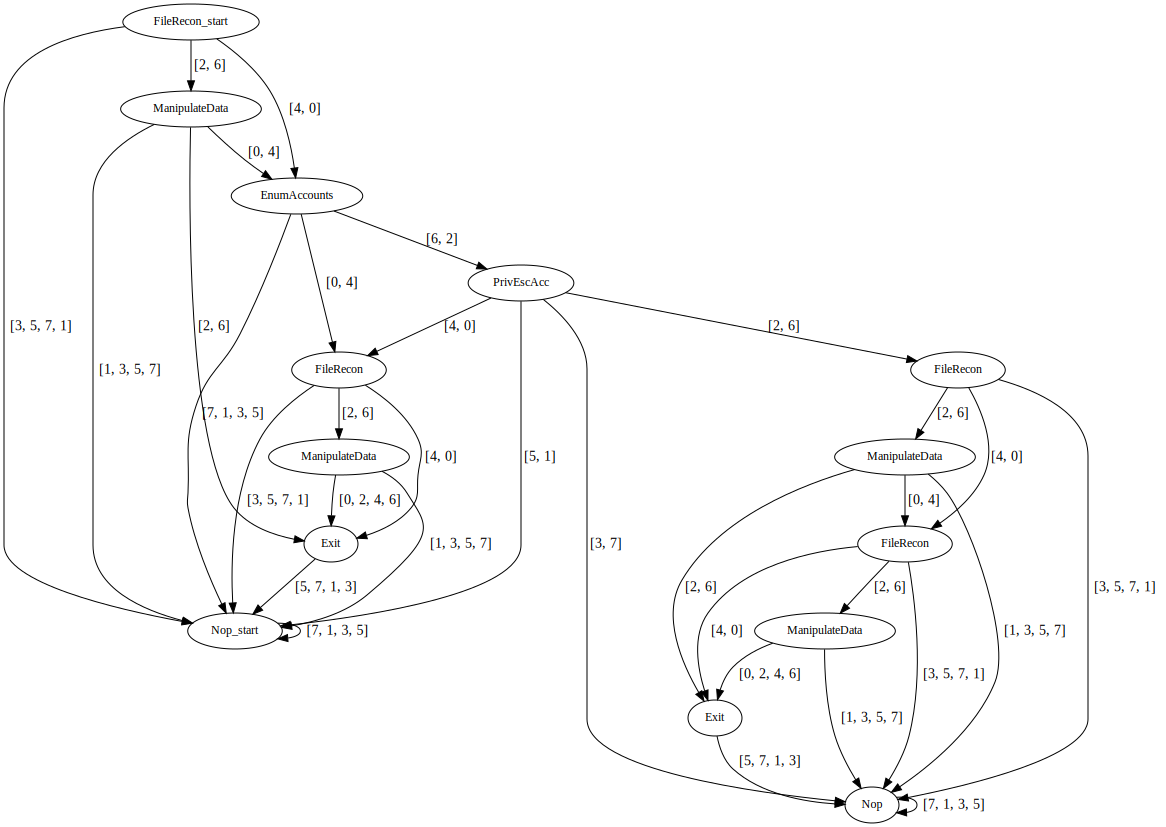

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/1889757798_attl0_pol_graph.json
Edge map is:
0:[(HostObs, user_files), (ActionResult, success), (ConnObs, active)]
1:[(HostObs, user_files), (ActionResult, success), (ConnObs, inactive)]
2:[(HostObs, none), (ActionResult, failure), (ConnObs, active)]
3:[(HostObs, none), (ActionResult, failure), (ConnObs, inactive)]
4:[(HostObs, none), (ActionResult, success), (ConnObs, active)]
5:[(HostObs, none), (ActionResult, success), (ConnObs, inactive)]
6:[(HostObs, user_files), (ActionResult, failure), (ConnObs, active)]
7:[(HostObs, user_files), (ActionResult, failure), (ConnObs, inactive)]


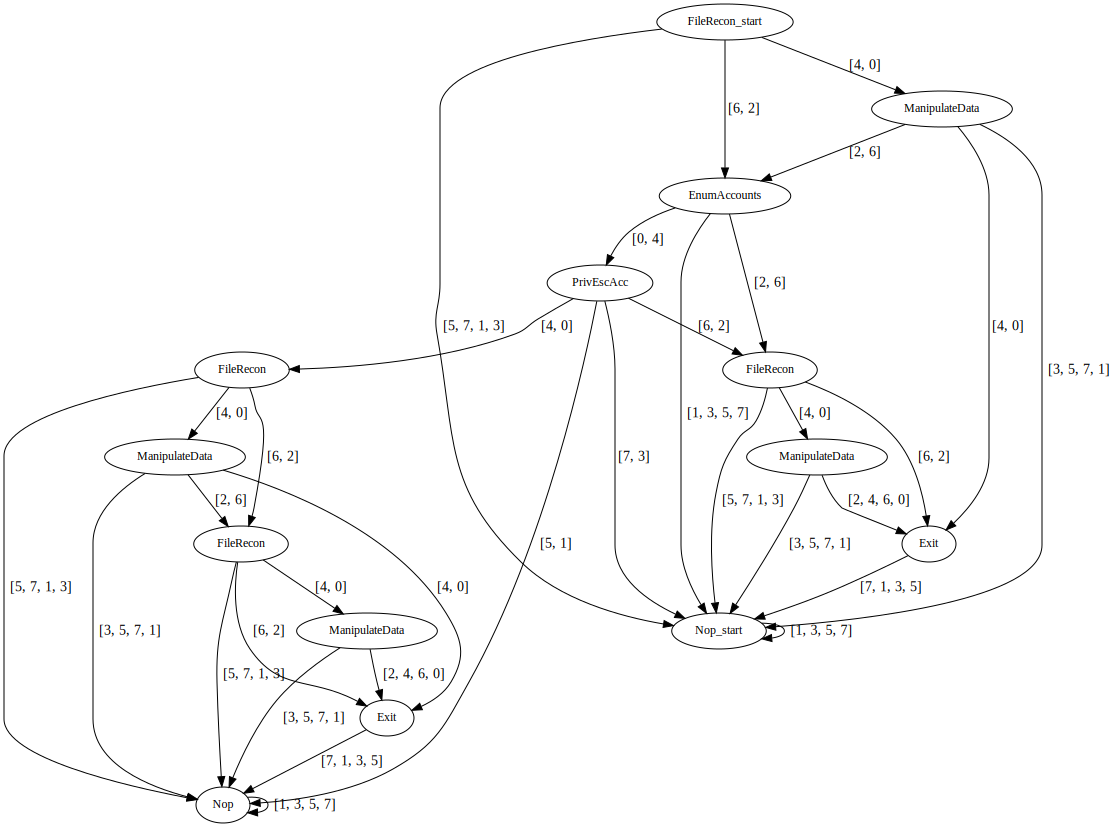

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/1890266440_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


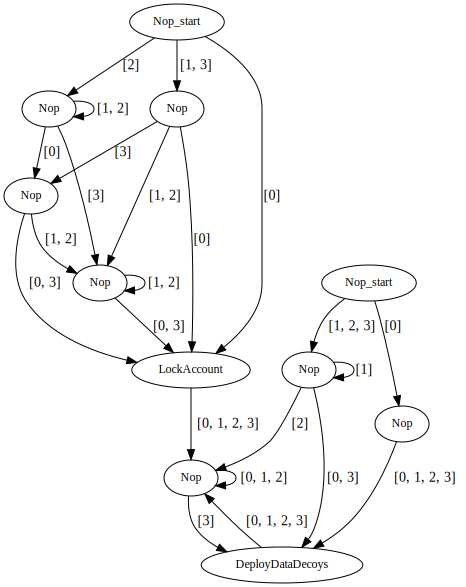

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/1527152775_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


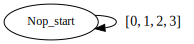

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/976827477_attl2_pol_graph.json
Edge map is:
0:[(HostObs, user_files), (ActionResult, failure), (ConnObs, inactive)]
1:[(HostObs, user_files), (ActionResult, success), (ConnObs, inactive)]
2:[(HostObs, none), (ActionResult, failure), (ConnObs, inactive)]
3:[(HostObs, none), (ActionResult, success), (ConnObs, inactive)]
4:[(HostObs, none), (ActionResult, failure), (ConnObs, active)]
5:[(HostObs, none), (ActionResult, success), (ConnObs, active)]
6:[(HostObs, user_files), (ActionResult, failure), (ConnObs, active)]
7:[(HostObs, user_files), (ActionResult, success), (ConnObs, active)]


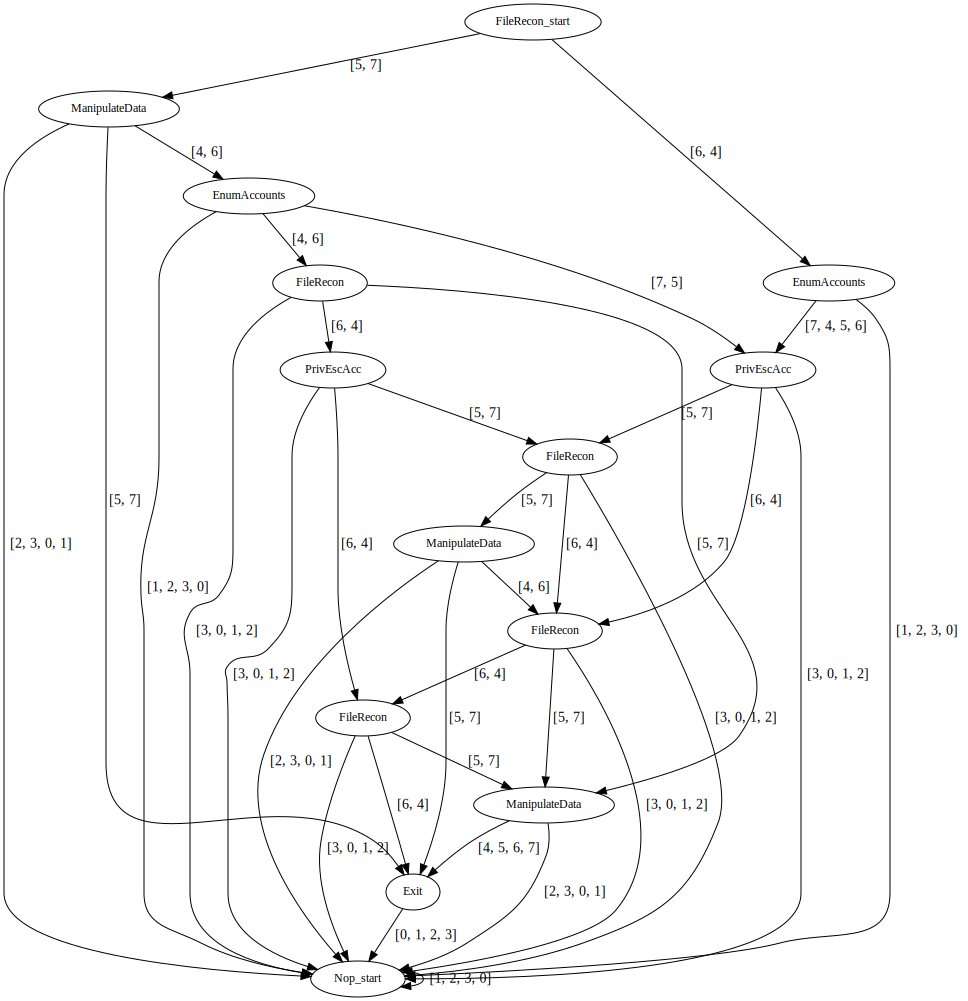

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/1261044180_defl3_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


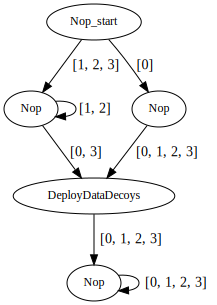

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.4.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.5.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.6.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.7.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.8.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.9.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.10.json
Using trace from /home/ashinde/PhD/CaffineBravery/res

+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                       file_write
2                               1.0                        file_enum
3                               1.0                         su_login
4                               1.0                        file_enum
5                               1.0                       file_write
6                               1.0                             none
7                               1.0                       file_write
8                               1.0                             none
9                               1.0                             none

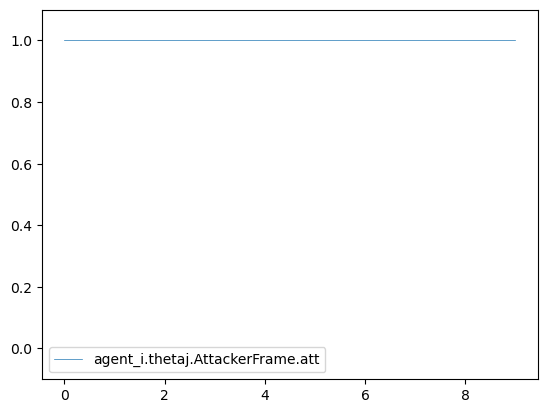

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.339934                        0.660066   
3                         0.339890                        0.660110   
4                         0.335592                        0.664408   
5                         0.520254                        0.479745   
6                         0.570101                        0.429899   
7                         0.570101                        0.429899   
8                         0.570101                        0.429899   
9                         0.570101                        0.429899   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           success   
1                         none                           failure   
2                         none                           success   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                         none                           success   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

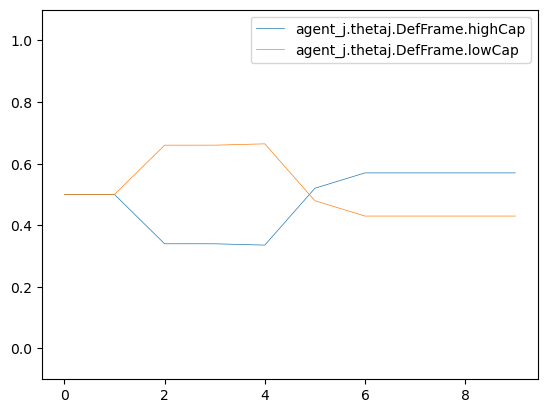

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop       FileRecon  
1                      1.0               Nop  ManipulateData  
2                      1.0  DeployDataDecoys    EnumAccounts  
3                      1.0               Nop      PrivEscAcc  
4                      1.0               Nop       FileRecon  
5                      1.0               Nop  ManipulateData  
6                      1.0               Nop            Exit  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

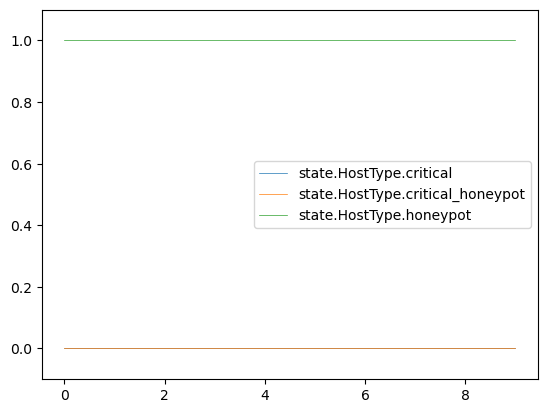

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop       FileRecon   
1                        1.0               Nop  ManipulateData   
2                        1.0  DeployDataDecoys    EnumAccounts   
3                        1.0               Nop      PrivEscAcc   
4                        1.0               Nop       FileRecon   
5                        1.0               Nop  ManipulateData   
6                        1.0               Nop            Exit   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                        file_enum  
3                         su_login  
4                        file_enum  
5                       file_write  
6                             none  
7                       file_write  
8                             none  
9                             none

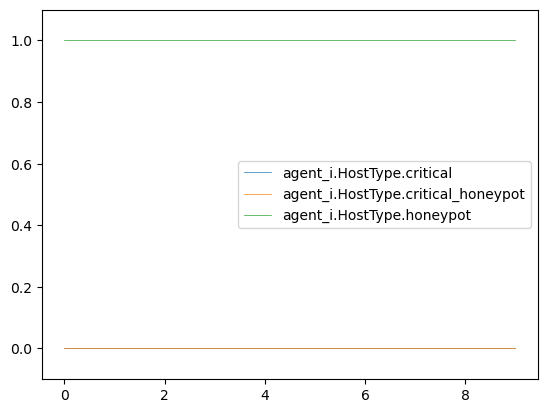

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0       FileRecon               Nop   
1                        0.0  ManipulateData               Nop   
2                        0.0    EnumAccounts  DeployDataDecoys   
3                        0.0      PrivEscAcc               Nop   
4                        0.0       FileRecon               Nop   
5                        0.0  ManipulateData               Nop   
6                        0.0            Exit               Nop   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           success   
1                         none                           failure   
2                         none                           success   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                         none                           success   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

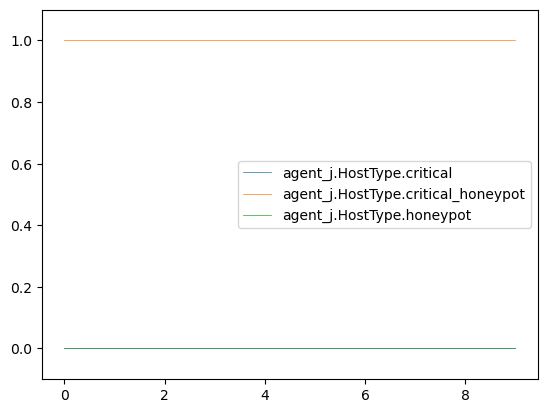

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0               Nop   
2                    1.0                     0.0  DeployDataDecoys   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

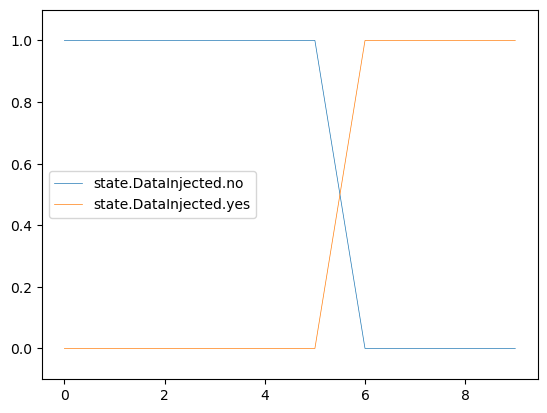

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000              0.000000e+00               Nop   
1                 1.000000              0.000000e+00               Nop   
2                 1.000000              0.000000e+00  DeployDataDecoys   
3                 1.000000              0.000000e+00               Nop   
4                 1.000000              0.000000e+00               Nop   
5                 1.000000              8.131786e-08               Nop   
6                 0.030699              9.693009e-01               Nop   
7                 0.000592              9.994081e-01               Nop   
8                 0.000268              9.997323e-01               Nop   
9                 0.000264              9.997359e-01               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                         su_login  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

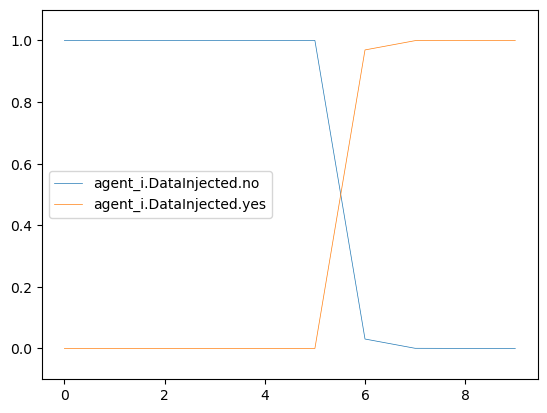

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000  ManipulateData   
2                 0.997753                  0.002247    EnumAccounts   
3                 0.997753                  0.002247      PrivEscAcc   
4                 0.997753                  0.002247       FileRecon   
5                 0.995734                  0.004266  ManipulateData   
6                 0.000127                  0.999873            Exit   
7                 0.000127                  0.999873             Nop   
8                 0.000127                  0.999873             Nop   
9                 0.000127                  0.999873             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                       active  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

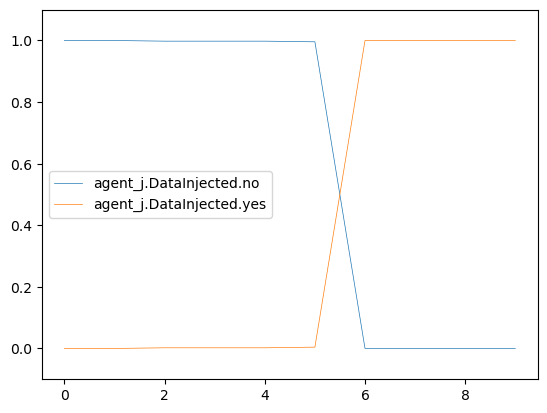

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop       FileRecon
1                 0.0                  1.0               Nop  ManipulateData
2                 0.0                  1.0  DeployDataDecoys    EnumAccounts
3                 0.0                  1.0               Nop      PrivEscAcc
4                 0.0                  1.0               Nop       FileRecon
5                 0.0                  1.0               Nop  ManipulateData
6                 0.0                  1.0               Nop            Exit
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

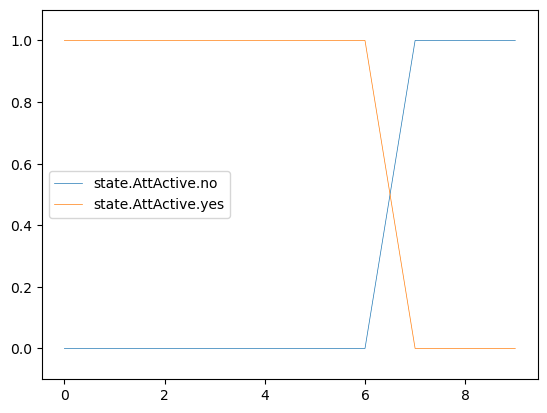

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          5.000000e-01           5.000000e-01               Nop   
1          1.020408e-02           9.897959e-01               Nop   
2          1.908033e-02           9.809197e-01  DeployDataDecoys   
3          2.294031e-04           9.997705e-01               Nop   
4          2.651126e-06           9.999974e-01               Nop   
5          2.736524e-08           1.000000e+00               Nop   
6          4.128534e-07           9.999997e-01               Nop   
7          9.995839e-01           4.161095e-04               Nop   
8          9.986254e-01           1.374541e-03               Nop   
9          9.999998e-01           4.745922e-08               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                         su_login  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

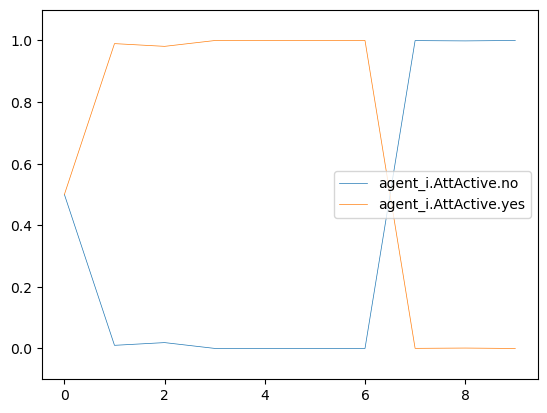

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0  ManipulateData   
2                   0.0                    1.0    EnumAccounts   
3                   0.0                    1.0      PrivEscAcc   
4                   0.0                    1.0       FileRecon   
5                   0.0                    1.0  ManipulateData   
6                   0.0                    1.0            Exit   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                       active  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

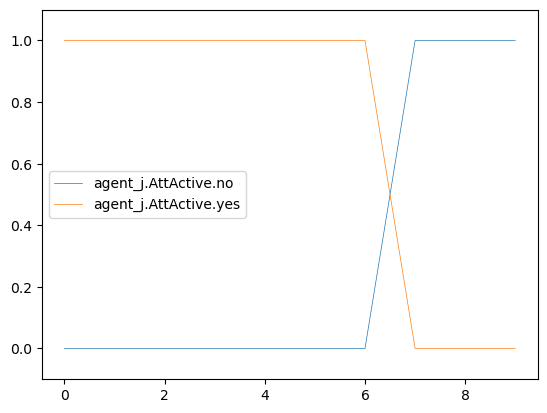

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop       FileRecon
1                1.0                 0.0               Nop  ManipulateData
2                1.0                 0.0  DeployDataDecoys    EnumAccounts
3                0.0                 1.0               Nop      PrivEscAcc
4                0.0                 1.0               Nop       FileRecon
5                0.0                 1.0               Nop  ManipulateData
6                0.0                 1.0               Nop            Exit
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

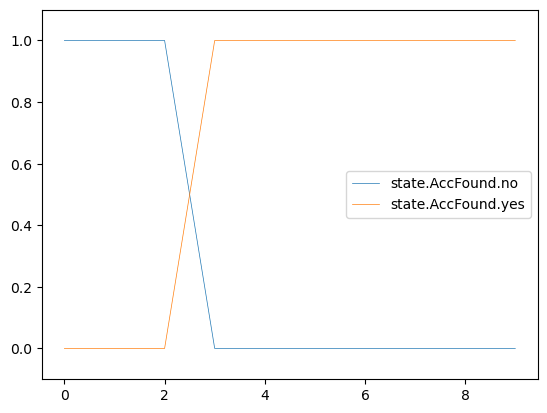

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000               Nop   
1             1.000000              0.000000               Nop   
2             0.917547              0.082453  DeployDataDecoys   
3             0.010227              0.989773               Nop   
4             0.001226              0.998774               Nop   
5             0.001122              0.998878               Nop   
6             0.000165              0.999835               Nop   
7             0.000169              0.999831               Nop   
8             0.000169              0.999831               Nop   
9             0.000169              0.999831               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                         su_login  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

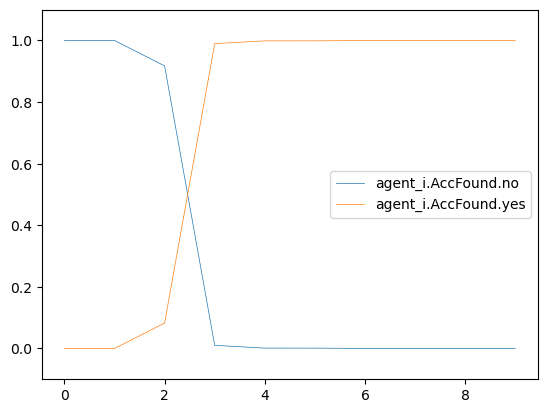

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000       FileRecon   
1             1.000000              0.000000  ManipulateData   
2             1.000000              0.000000    EnumAccounts   
3             0.101815              0.898186      PrivEscAcc   
4             0.000113              0.999887       FileRecon   
5             0.000050              0.999950  ManipulateData   
6             0.000033              0.999967            Exit   
7             0.000033              0.999967             Nop   
8             0.000033              0.999967             Nop   
9             0.000033              0.999967             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                       active  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

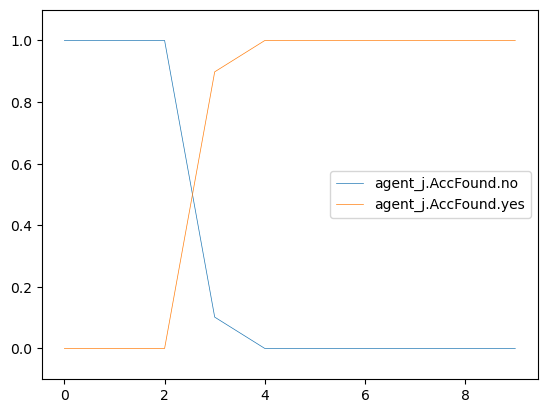

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0               Nop   
2                   1.0                    0.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

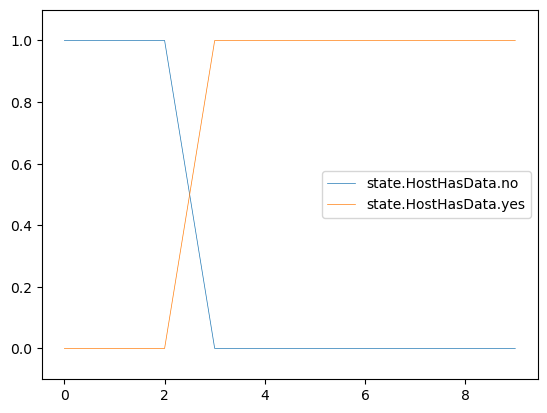

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0               Nop   
2                     1.0                      0.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                         su_login  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

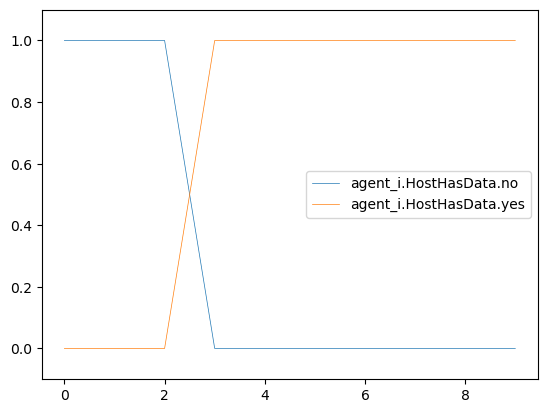

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.192308                 0.807692  ManipulateData   
2                0.623596                 0.376404    EnumAccounts   
3                0.423826                 0.576174      PrivEscAcc   
4                0.416617                 0.583383       FileRecon   
5                0.087690                 0.912310  ManipulateData   
6                0.000099                 0.999901            Exit   
7                0.000099                 0.999901             Nop   
8                0.000099                 0.999901             Nop   
9                0.000099                 0.999901             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                       active  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

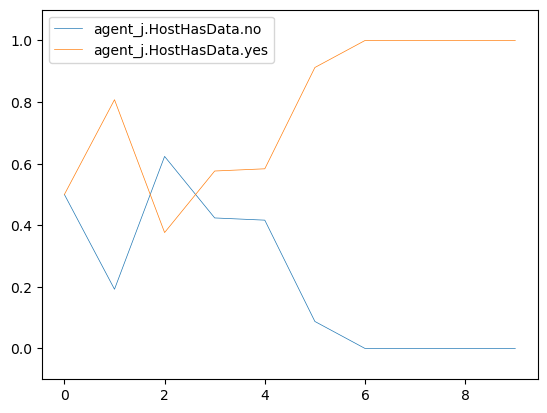

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0               Nop   
2                   0.0                    1.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

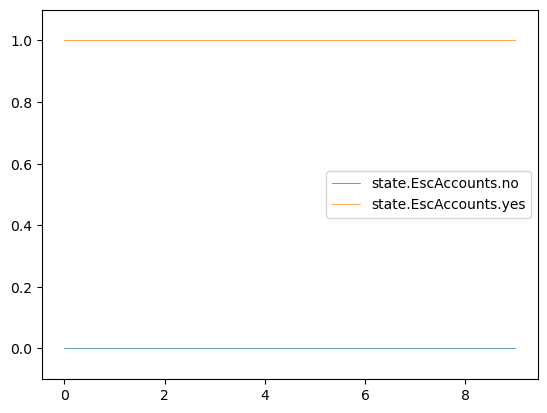

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     0.0                      1.0               Nop   
1                     0.0                      1.0               Nop   
2                     0.0                      1.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                         su_login  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

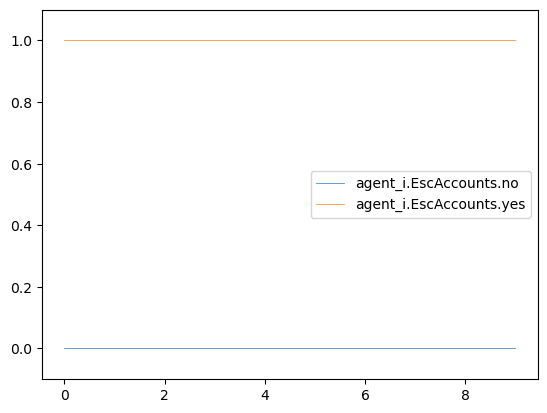

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000  ManipulateData   
2                0.500000                 0.500000    EnumAccounts   
3                0.100806                 0.899194      PrivEscAcc   
4                0.000112                 0.999888       FileRecon   
5                0.000049                 0.999951  ManipulateData   
6                0.000032                 0.999967            Exit   
7                0.000032                 0.999968             Nop   
8                0.000032                 0.999968             Nop   
9                0.000032                 0.999968             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                       active  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

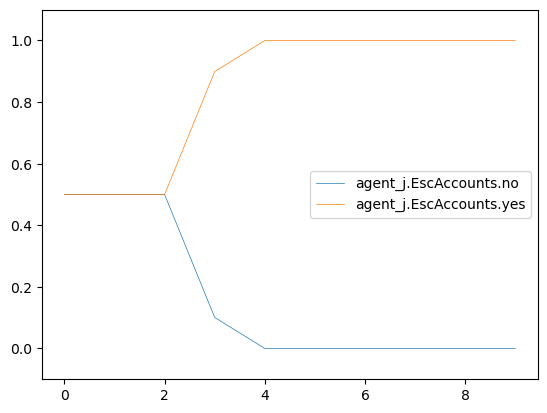

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0               Nop   
2                     0.0                     1.0  DeployDataDecoys   
3                     0.0                     1.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

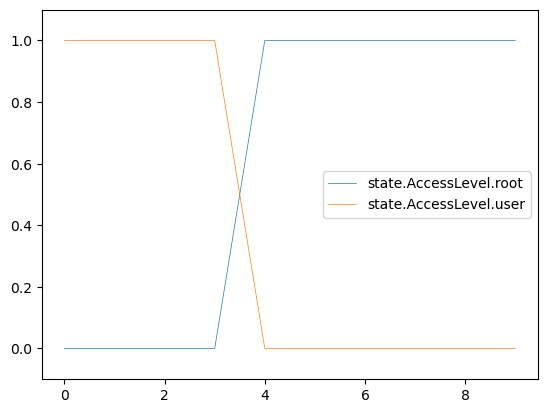

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000               Nop   
1                  0.000000                  1.000000               Nop   
2                  0.000000                  1.000000  DeployDataDecoys   
3                  0.000947                  0.999053               Nop   
4                  0.997631                  0.002369               Nop   
5                  0.998877                  0.001123               Nop   
6                  0.999835                  0.000166               Nop   
7                  0.999831                  0.000169               Nop   
8                  0.999831                  0.000169               Nop   
9                  0.999831                  0.000169               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                         su_login  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

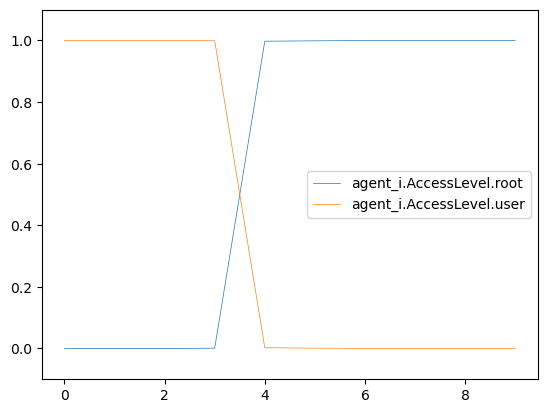

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000  ManipulateData   
2                  0.000000                  1.000000    EnumAccounts   
3                  0.000000                  1.000000      PrivEscAcc   
4                  0.999887                  0.000113       FileRecon   
5                  0.999950                  0.000050  ManipulateData   
6                  0.999967                  0.000033            Exit   
7                  0.999967                  0.000033             Nop   
8                  0.999967                  0.000033             Nop   
9                  0.999967                  0.000033             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                       active  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

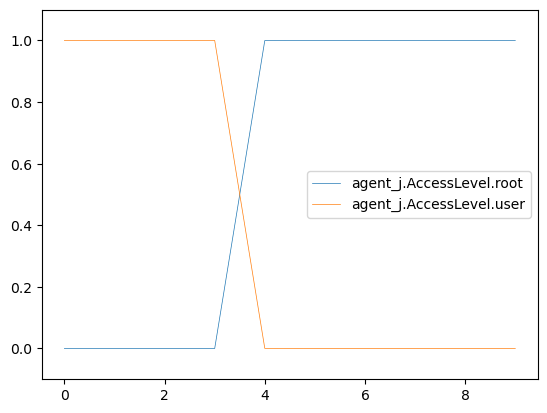

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop       FileRecon
1                 1.0                  0.0               Nop  ManipulateData
2                 1.0                  0.0  DeployDataDecoys    EnumAccounts
3                 1.0                  0.0               Nop      PrivEscAcc
4                 1.0                  0.0               Nop       FileRecon
5                 0.0                  1.0               Nop  ManipulateData
6                 0.0                  1.0               Nop            Exit
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

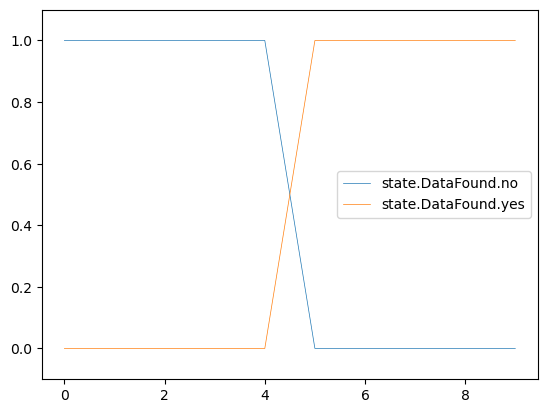

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000               Nop   
2              1.000000               0.000000  DeployDataDecoys   
3              1.000000               0.000000               Nop   
4              0.999991               0.000009               Nop   
5              0.200907               0.799093               Nop   
6              0.027590               0.972410               Nop   
7              0.000298               0.999702               Nop   
8              0.000262               0.999737               Nop   
9              0.000262               0.999737               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                         su_login  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

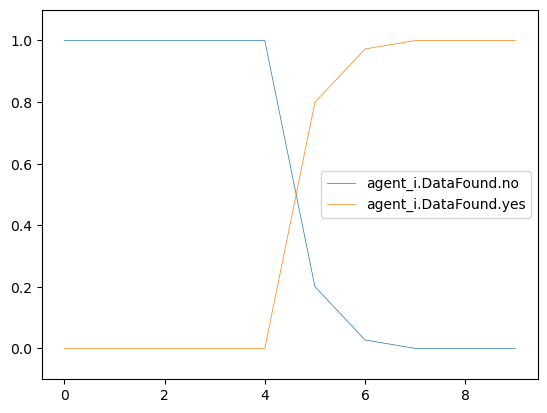

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000       FileRecon   
1              0.307692               0.692308  ManipulateData   
2              0.997753               0.002247    EnumAccounts   
3              0.997753               0.002247      PrivEscAcc   
4              0.997753               0.002247       FileRecon   
5              0.112278               0.887722  ManipulateData   
6              0.000127               0.999873            Exit   
7              0.000127               0.999873             Nop   
8              0.000127               0.999873             Nop   
9              0.000127               0.999873             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                       active  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

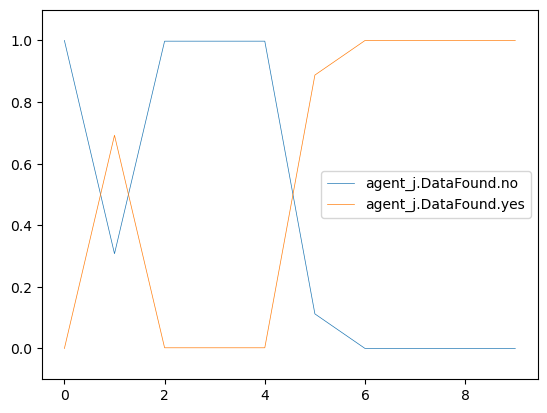

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0               Nop   
2                   1.0                   0.0  DeployDataDecoys   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

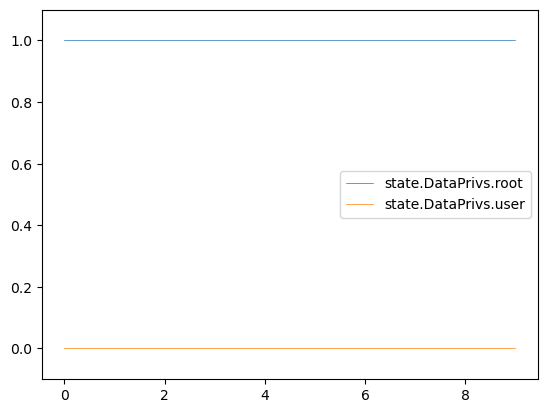

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0               Nop   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                         su_login  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

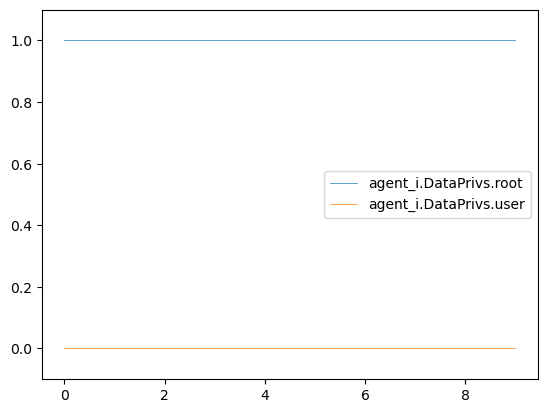

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.192308                0.807692  ManipulateData   
2                0.623596                0.376404    EnumAccounts   
3                0.623596                0.376405      PrivEscAcc   
4                0.623596                0.376404       FileRecon   
5                0.692492                0.307508  ManipulateData   
6                0.710877                0.289123            Exit   
7                0.710877                0.289123             Nop   
8                0.710877                0.289123             Nop   
9                0.710877                0.289123             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                       active  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

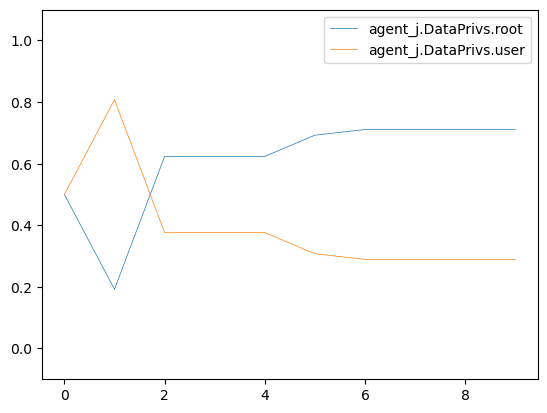

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                         su_login
3                               1.0                        file_enum
4                               1.0                        file_enum
5                               1.0                       file_write
6                               1.0                             none
7                               1.0                       file_write
8                               1.0                       file_write
9                               1.0                             none

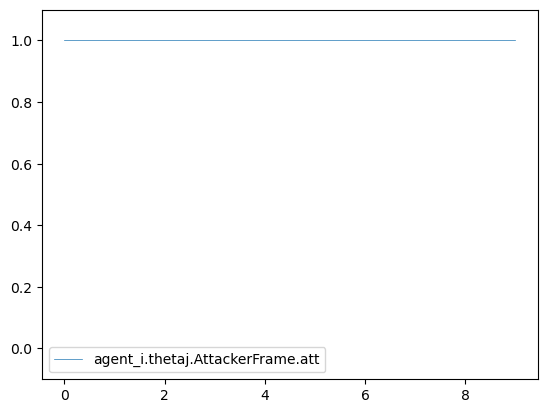

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.339934                        0.660066   
3                         0.335681                        0.664319   
4                         0.167236                        0.832764   
5                         0.433538                        0.566462   
6                         0.566914                        0.433086   
7                         0.566914                        0.433086   
8                         0.566914                        0.433086   
9                         0.566914                        0.433086   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                   user_files                           success   
3                         none                           failure   
4                         none                           success   
5                         none                           success   
6                         none                           failure   
7                         none                           success   
8                   user_files                           success   
9                   user_files                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

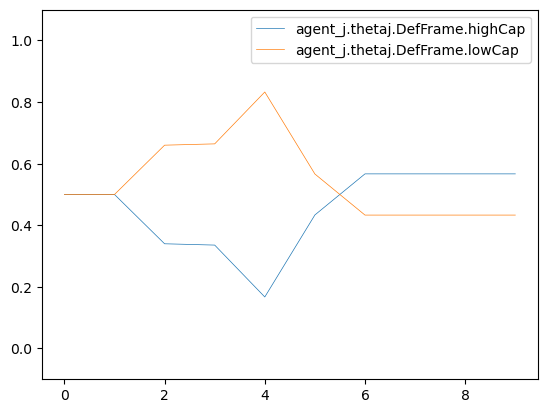

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop       FileRecon  
1                      1.0               Nop    EnumAccounts  
2                      1.0  DeployDataDecoys      PrivEscAcc  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop       FileRecon  
5                      1.0               Nop  ManipulateData  
6                      1.0               Nop            Exit  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

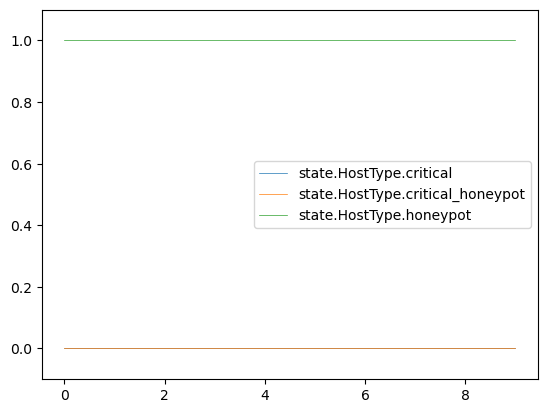

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop       FileRecon   
1                        1.0               Nop    EnumAccounts   
2                        1.0  DeployDataDecoys      PrivEscAcc   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop       FileRecon   
5                        1.0               Nop  ManipulateData   
6                        1.0               Nop            Exit   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                         su_login  
3                        file_enum  
4                        file_enum  
5                       file_write  
6                             none  
7                       file_write  
8                       file_write  
9                             none

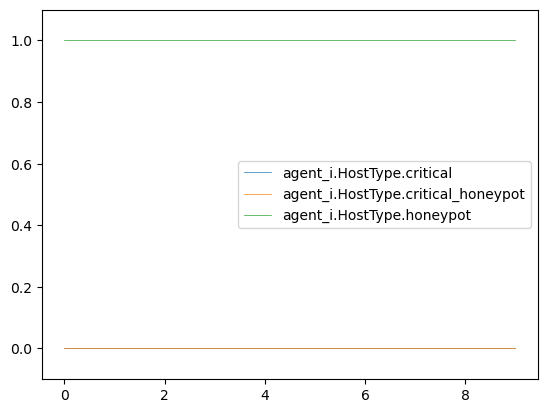

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0       FileRecon               Nop   
1                        0.0    EnumAccounts               Nop   
2                        0.0      PrivEscAcc  DeployDataDecoys   
3                        0.0       FileRecon               Nop   
4                        0.0       FileRecon               Nop   
5                        0.0  ManipulateData               Nop   
6                        0.0            Exit               Nop   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                   user_files                           success   
3                         none                           failure   
4                         none                           success   
5                         none                           success   
6                         none                           failure   
7                         none                           success   
8                   user_files                           success   
9                   user_files                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

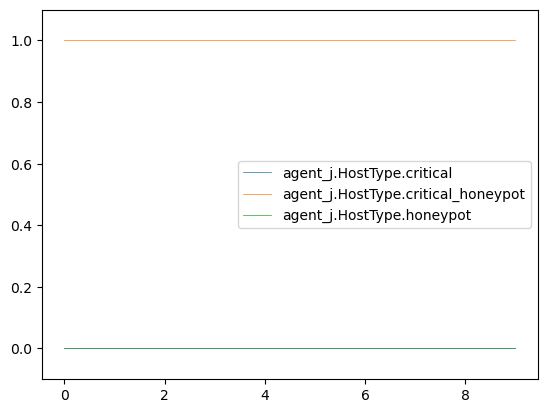

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0               Nop   
2                    1.0                     0.0  DeployDataDecoys   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

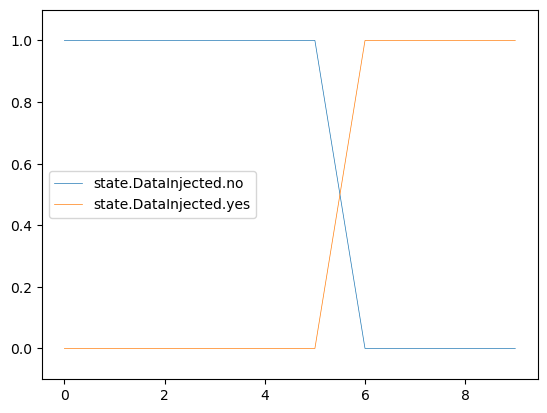

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000               Nop   
2                 1.000000                  0.000000  DeployDataDecoys   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.973177                  0.026823               Nop   
6                 0.032274                  0.967726               Nop   
7                 0.030164                  0.969836               Nop   
8                 0.030164                  0.969836               Nop   
9                 0.030164                  0.969836               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                             none

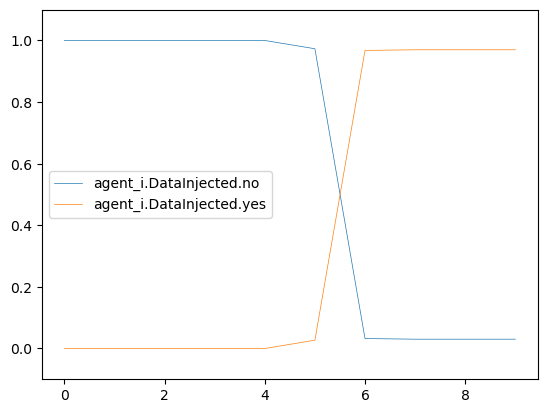

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000       FileRecon   
5                 1.000000                  0.000000  ManipulateData   
6                 0.000335                  0.999665            Exit   
7                 0.000335                  0.999665             Nop   
8                 0.000335                  0.999665             Nop   
9                 0.000335                  0.999665             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

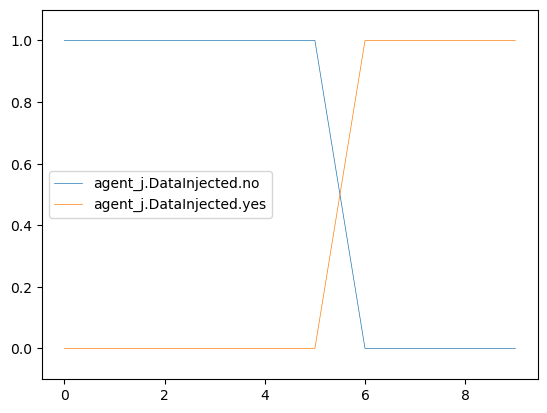

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop       FileRecon
1                 0.0                  1.0               Nop    EnumAccounts
2                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop       FileRecon
5                 0.0                  1.0               Nop  ManipulateData
6                 0.0                  1.0               Nop            Exit
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

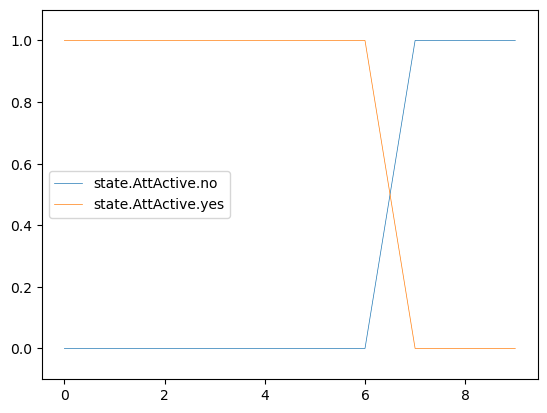

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          5.000000e-01           5.000000e-01               Nop   
1          1.020408e-02           9.897959e-01               Nop   
2          1.179412e-04           9.998820e-01  DeployDataDecoys   
3          1.229218e-06           9.999988e-01               Nop   
4          1.267250e-08           1.000000e+00               Nop   
5          4.768690e-10           1.000000e+00               Nop   
6          1.537723e-02           9.846229e-01               Nop   
7          9.999721e-01           2.795836e-05               Nop   
8          9.999998e-01           1.317976e-07               Nop   
9          1.000000e+00           6.859542e-12               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                             none

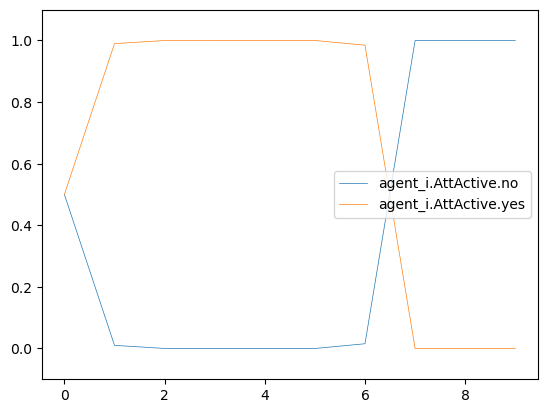

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0       FileRecon   
5                   0.0                    1.0  ManipulateData   
6                   0.0                    1.0            Exit   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

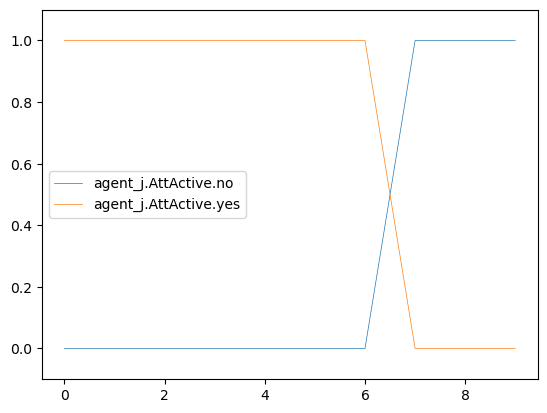

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop       FileRecon
1                1.0                 0.0               Nop    EnumAccounts
2                0.0                 1.0  DeployDataDecoys      PrivEscAcc
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop       FileRecon
5                0.0                 1.0               Nop  ManipulateData
6                0.0                 1.0               Nop            Exit
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

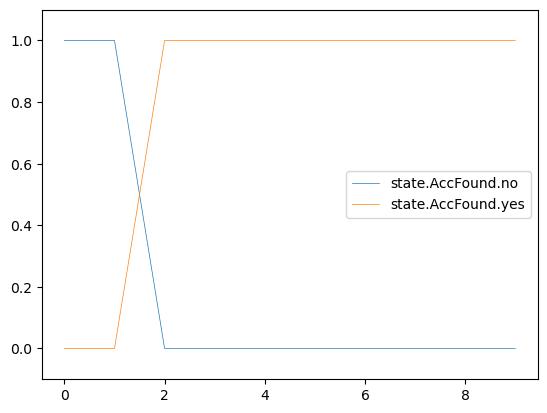

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000               Nop   
1             1.000000              0.000000               Nop   
2             0.011249              0.988751  DeployDataDecoys   
3             0.010001              0.989999               Nop   
4             0.010000              0.990000               Nop   
5             0.032889              0.967111               Nop   
6             0.012370              0.987630               Nop   
7             0.012397              0.987603               Nop   
8             0.012397              0.987603               Nop   
9             0.012397              0.987603               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                             none

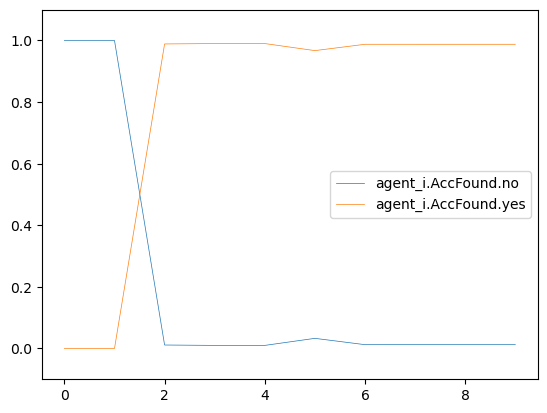

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000       FileRecon   
1             1.000000              0.000000    EnumAccounts   
2             0.901786              0.098214      PrivEscAcc   
3             0.009107              0.990892       FileRecon   
4             0.013630              0.986370       FileRecon   
5             0.006387              0.993613  ManipulateData   
6             0.002761              0.997239            Exit   
7             0.002761              0.997239             Nop   
8             0.002761              0.997239             Nop   
9             0.002761              0.997239             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

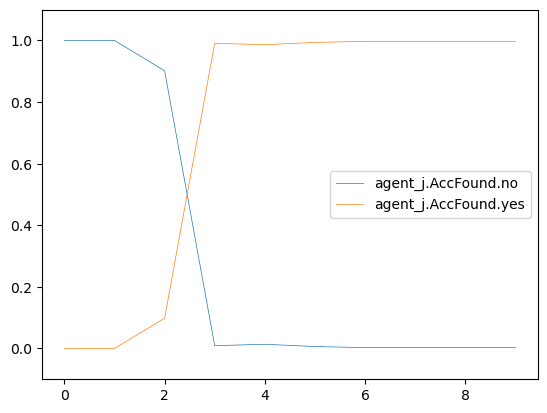

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0               Nop   
2                   1.0                    0.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

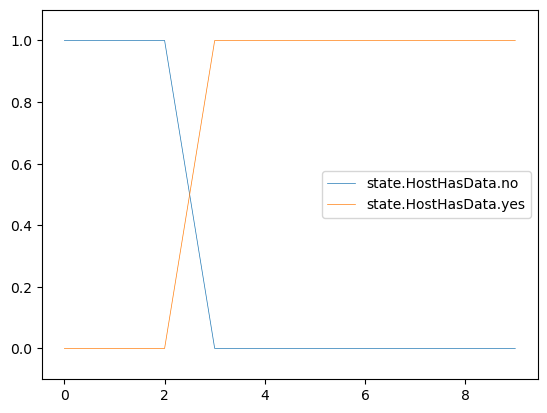

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0               Nop   
2                     1.0                      0.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                             none

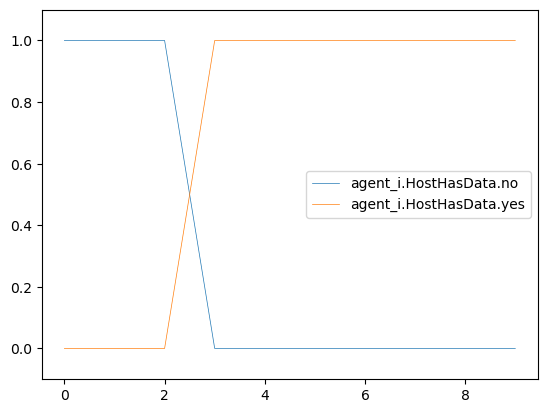

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.608108                 0.391892    EnumAccounts   
2                0.608108                 0.391892      PrivEscAcc   
3                0.406240                 0.593760       FileRecon   
4                0.704979                 0.295021       FileRecon   
5                0.235380                 0.764620  ManipulateData   
6                0.000314                 0.999686            Exit   
7                0.000314                 0.999686             Nop   
8                0.000314                 0.999686             Nop   
9                0.000314                 0.999686             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

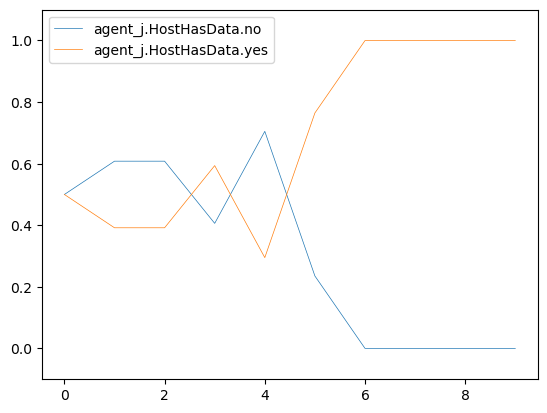

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0               Nop   
2                   0.0                    1.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

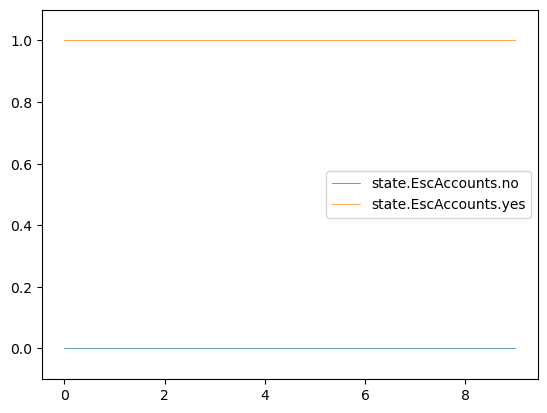

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     0.0                      1.0               Nop   
1                     0.0                      1.0               Nop   
2                     0.0                      1.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                             none

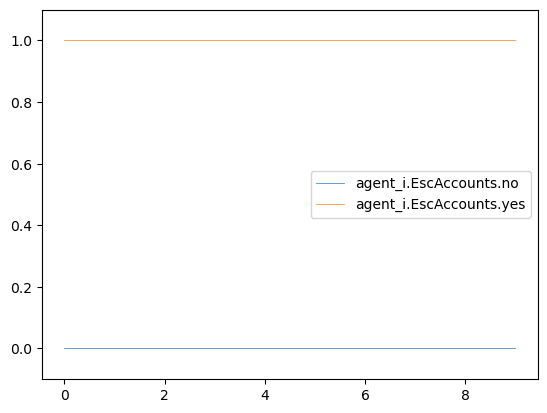

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.892857                 0.107143      PrivEscAcc   
3                0.009017                 0.990983       FileRecon   
4                0.013495                 0.986505       FileRecon   
5                0.006324                 0.993676  ManipulateData   
6                0.002733                 0.997267            Exit   
7                0.002733                 0.997267             Nop   
8                0.002733                 0.997267             Nop   
9                0.002733                 0.997267             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

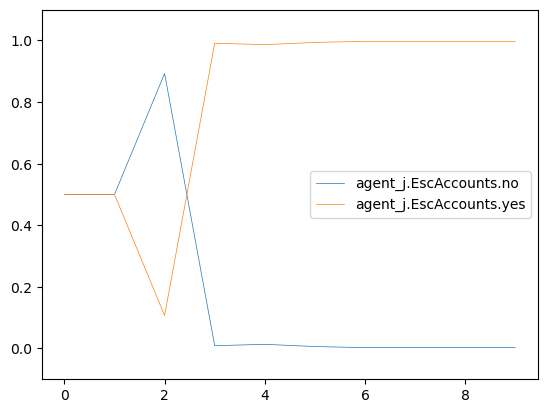

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0               Nop   
2                     0.0                     1.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

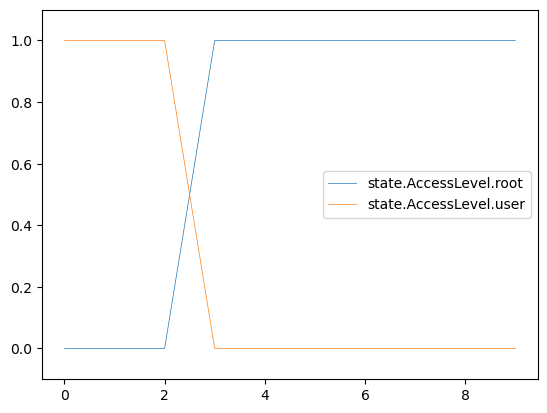

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000               Nop   
1                  0.000000                  1.000000               Nop   
2                  0.000000                  1.000000  DeployDataDecoys   
3                  0.989987                  0.010013               Nop   
4                  0.989999                  0.010001               Nop   
5                  0.967111                  0.032889               Nop   
6                  0.987630                  0.012370               Nop   
7                  0.987603                  0.012397               Nop   
8                  0.987603                  0.012397               Nop   
9                  0.987603                  0.012397               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                             none

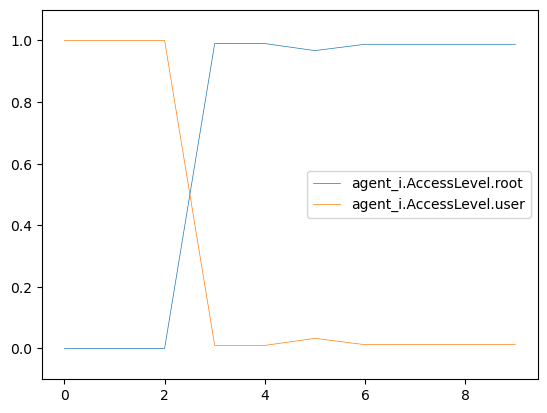

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.990892                  0.009107       FileRecon   
4                  0.986370                  0.013630       FileRecon   
5                  0.993613                  0.006387  ManipulateData   
6                  0.997239                  0.002761            Exit   
7                  0.997239                  0.002761             Nop   
8                  0.997239                  0.002761             Nop   
9                  0.997239                  0.002761             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

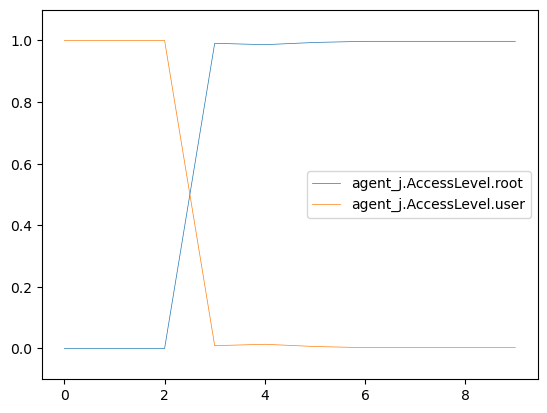

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop       FileRecon
1                 1.0                  0.0               Nop    EnumAccounts
2                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
3                 1.0                  0.0               Nop       FileRecon
4                 1.0                  0.0               Nop       FileRecon
5                 0.0                  1.0               Nop  ManipulateData
6                 0.0                  1.0               Nop            Exit
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

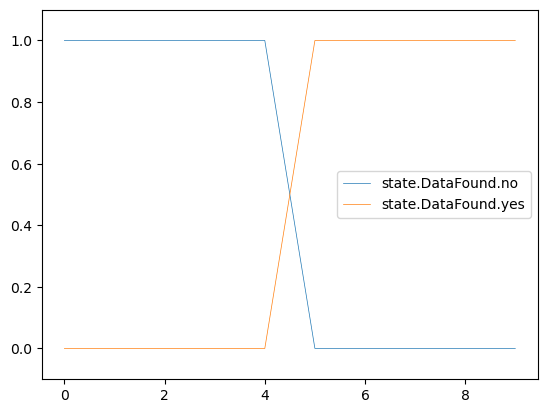

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000               Nop   
2              1.000000               0.000000  DeployDataDecoys   
3              1.000000               0.000000               Nop   
4              0.208001               0.791999               Nop   
5              0.163725               0.836275               Nop   
6              0.029873               0.970127               Nop   
7              0.029904               0.970096               Nop   
8              0.029904               0.970096               Nop   
9              0.029904               0.970096               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                             none

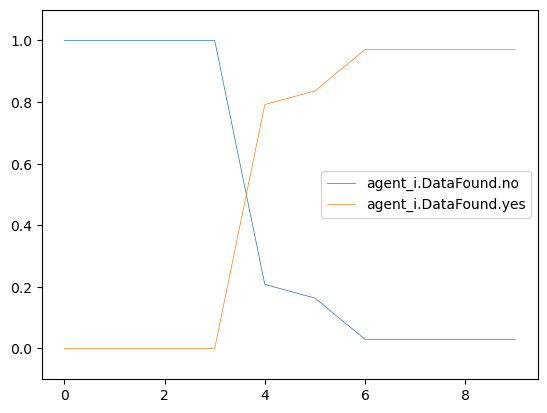

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000       FileRecon   
1              0.972973               0.027027    EnumAccounts   
2              0.972973               0.027027      PrivEscAcc   
3              0.972973               0.027027       FileRecon   
4              0.907648               0.092352       FileRecon   
5              0.250630               0.749370  ManipulateData   
6              0.000335               0.999665            Exit   
7              0.000335               0.999665             Nop   
8              0.000335               0.999665             Nop   
9              0.000335               0.999665             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

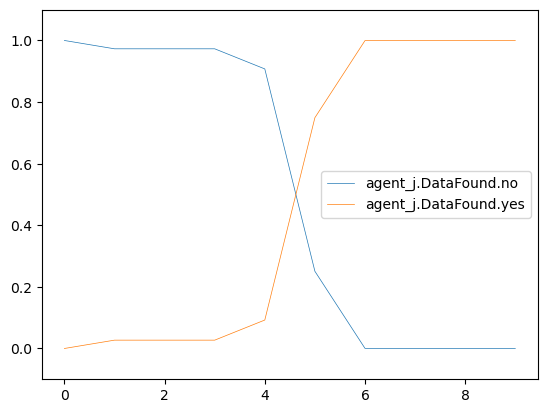

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0               Nop   
2                   1.0                   0.0  DeployDataDecoys   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

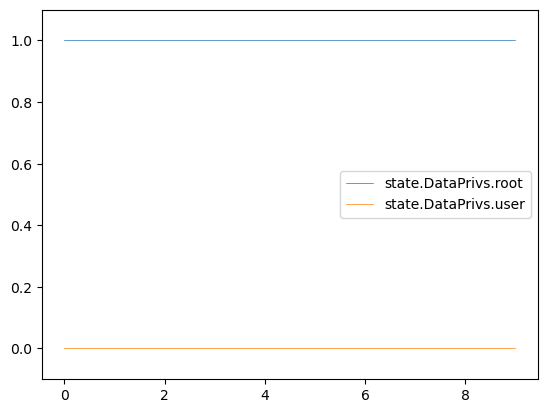

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0               Nop   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                       file_write  
8             Nop                       file_write  
9             Nop                             none

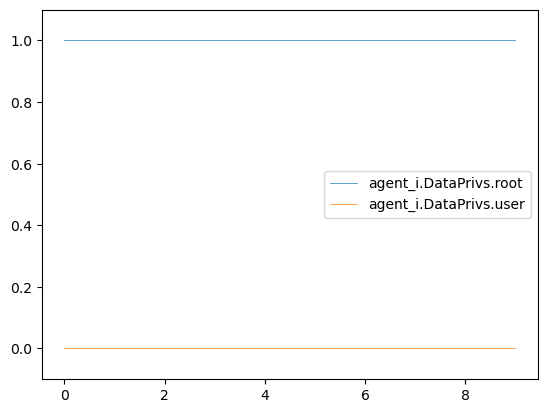

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.608108                0.391892    EnumAccounts   
2                0.608108                0.391892      PrivEscAcc   
3                0.608108                0.391892       FileRecon   
4                0.560765                0.439235       FileRecon   
5                0.651780                0.348220  ManipulateData   
6                0.697340                0.302660            Exit   
7                0.697340                0.302660             Nop   
8                0.697340                0.302660             Nop   
9                0.697340                0.302660             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

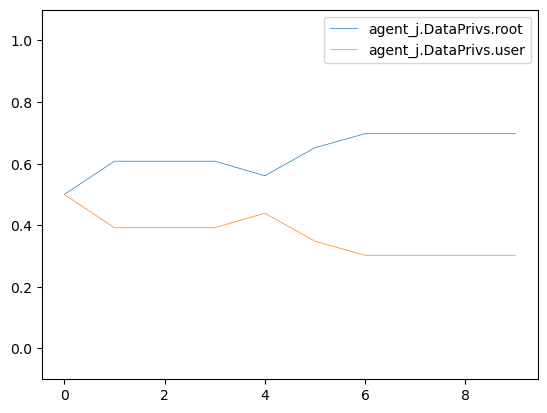

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                         su_login
1                               1.0                        file_enum
2                               1.0                         su_login
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                       file_write
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                       file_write

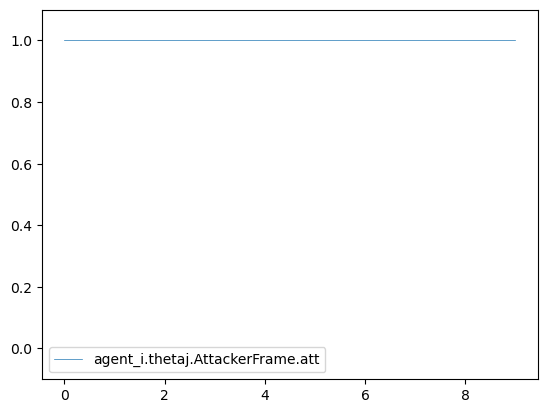

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.339934                        0.660066   
3                         0.335681                        0.664319   
4                         0.511677                        0.488323   
5                         0.557917                        0.442083   
6                         0.557917                        0.442083   
7                         0.557917                        0.442083   
8                         0.557917                        0.442083   
9                         0.557917                        0.442083   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                         none                           success   
3                         none                           success   
4                         none                           success   
5                   user_files                           failure   
6                         none                           success   
7                   user_files                           success   
8                   user_files                           success   
9                         none                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

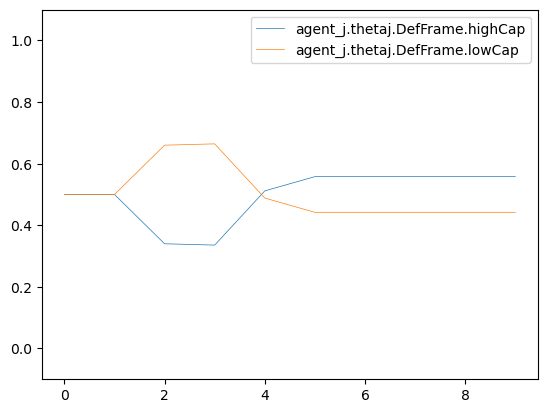

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop       FileRecon  
1                      1.0               Nop    EnumAccounts  
2                      1.0  DeployDataDecoys      PrivEscAcc  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop  ManipulateData  
5                      1.0               Nop            Exit  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

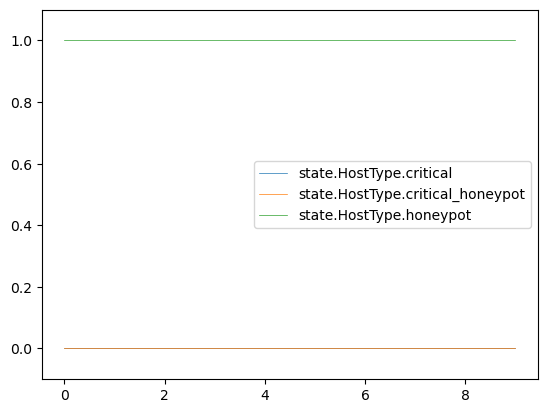

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop       FileRecon   
1                        1.0               Nop    EnumAccounts   
2                        1.0  DeployDataDecoys      PrivEscAcc   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop  ManipulateData   
5                        1.0               Nop            Exit   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                         su_login  
1                        file_enum  
2                         su_login  
3                        file_enum  
4                       file_write  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                       file_write

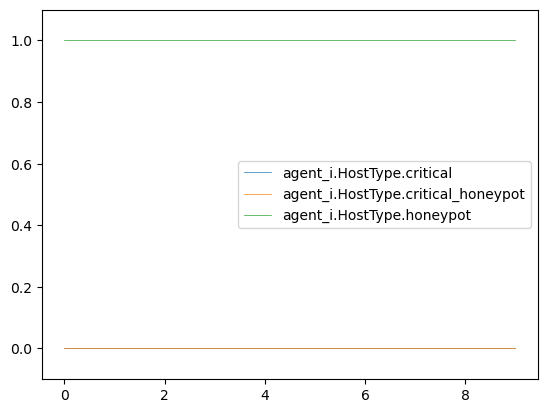

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0       FileRecon               Nop   
1                        0.0    EnumAccounts               Nop   
2                        0.0      PrivEscAcc  DeployDataDecoys   
3                        0.0       FileRecon               Nop   
4                        0.0  ManipulateData               Nop   
5                        0.0            Exit               Nop   
6                        0.0             Nop               Nop   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                         none                           success   
3                         none                           success   
4                         none                           success   
5                   user_files                           failure   
6                         none                           success   
7                   user_files                           success   
8                   user_files                           success   
9                         none                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

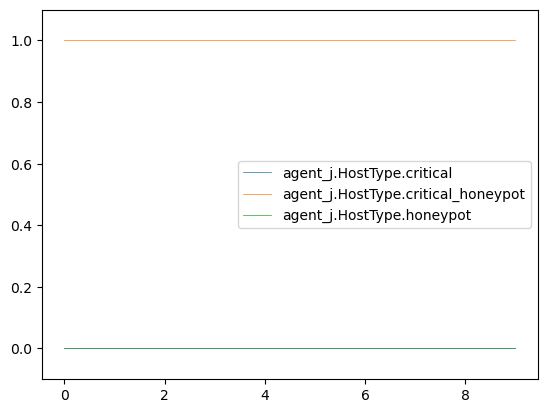

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0               Nop   
2                    1.0                     0.0  DeployDataDecoys   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

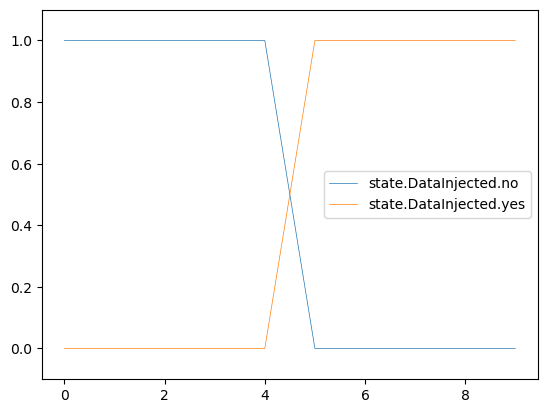

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000               Nop   
2                 1.000000                  0.000000  DeployDataDecoys   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.031978                  0.968022               Nop   
6                 0.003261                  0.996739               Nop   
7                 0.001873                  0.998127               Nop   
8                 0.001870                  0.998130               Nop   
9                 0.001870                  0.998130               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                         su_login  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

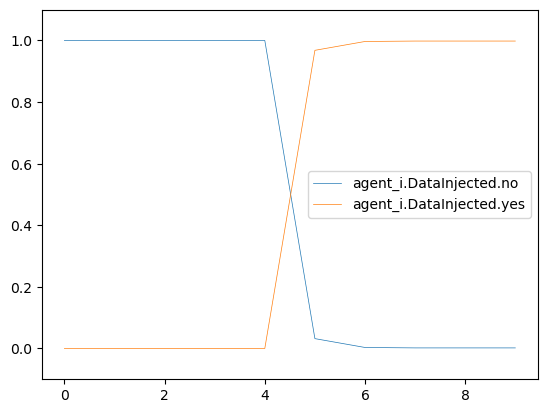

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                  1.00000                   0.00000       FileRecon   
1                  1.00000                   0.00000    EnumAccounts   
2                  1.00000                   0.00000      PrivEscAcc   
3                  1.00000                   0.00000       FileRecon   
4                  1.00000                   0.00000  ManipulateData   
5                  0.00012                   0.99988            Exit   
6                  0.00012                   0.99988             Nop   
7                  0.00012                   0.99988             Nop   
8                  0.00012                   0.99988             Nop   
9                  0.00012                   0.99988             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

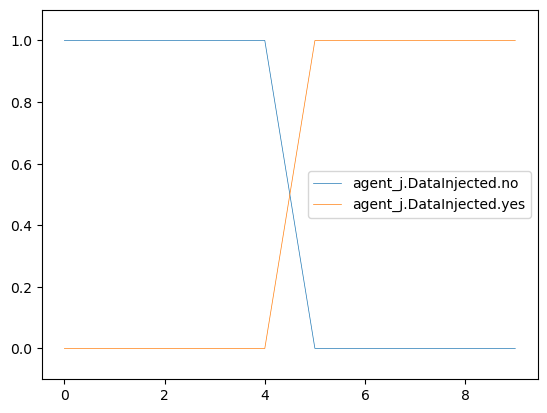

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop       FileRecon
1                 0.0                  1.0               Nop    EnumAccounts
2                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

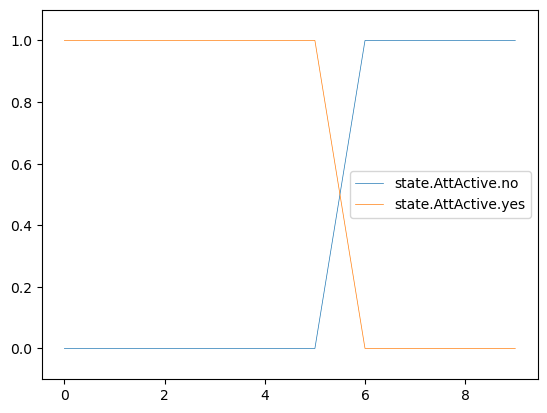

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          5.000000e-01           5.000000e-01               Nop   
1          5.000000e-01           5.000000e-01               Nop   
2          1.131222e-02           9.886877e-01  DeployDataDecoys   
3          1.180867e-04           9.998819e-01               Nop   
4          1.217544e-06           9.999988e-01               Nop   
5          3.409272e-07           9.999996e-01               Nop   
6          9.844657e-01           1.553425e-02               Nop   
7          9.999815e-01           1.854013e-05               Nop   
8          9.999999e-01           4.679275e-08               Nop   
9          1.000000e+00           1.679147e-16               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                         su_login  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

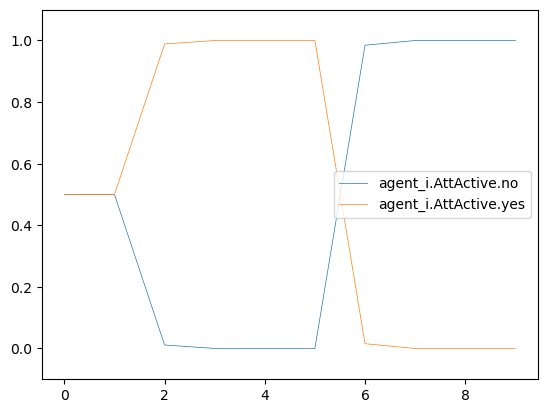

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

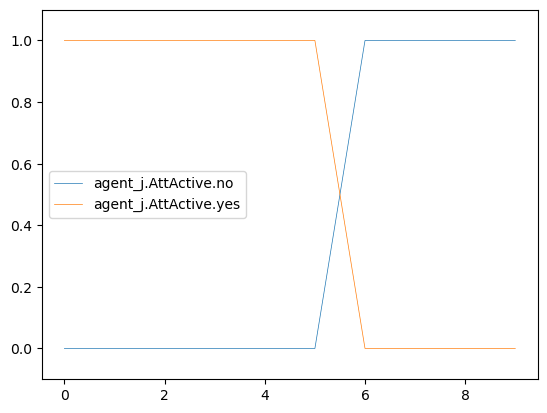

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop       FileRecon
1                1.0                 0.0               Nop    EnumAccounts
2                0.0                 1.0  DeployDataDecoys      PrivEscAcc
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop  ManipulateData
5                0.0                 1.0               Nop            Exit
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

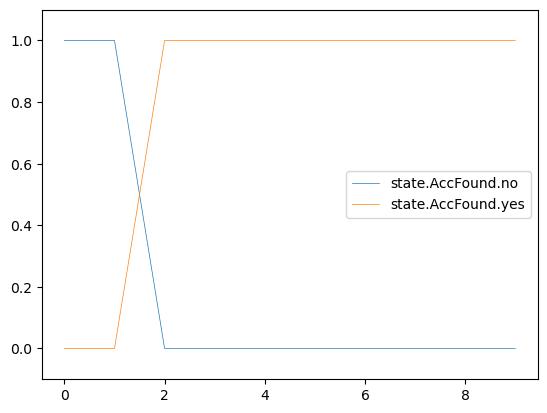

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000               Nop   
1             1.000000              0.000000               Nop   
2             0.022319              0.977681  DeployDataDecoys   
3             0.010117              0.989883               Nop   
4             0.010001              0.989999               Nop   
5             0.001484              0.998516               Nop   
6             0.001557              0.998443               Nop   
7             0.001559              0.998441               Nop   
8             0.001559              0.998441               Nop   
9             0.001559              0.998441               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                         su_login  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

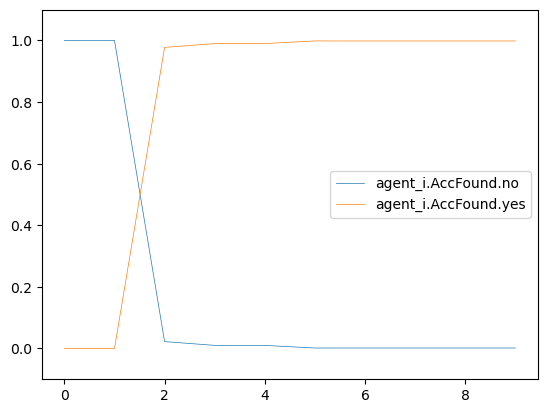

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000       FileRecon   
1             1.000000              0.000000    EnumAccounts   
2             0.101815              0.898186      PrivEscAcc   
3             0.000113              0.999887       FileRecon   
4             0.000053              0.999947  ManipulateData   
5             0.000037              0.999963            Exit   
6             0.000037              0.999963             Nop   
7             0.000037              0.999963             Nop   
8             0.000037              0.999963             Nop   
9             0.000037              0.999963             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

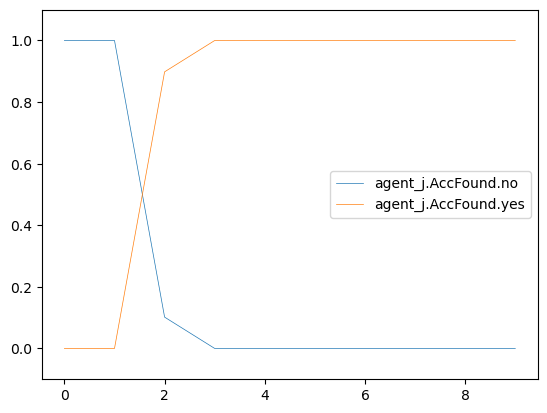

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0               Nop   
2                   1.0                    0.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

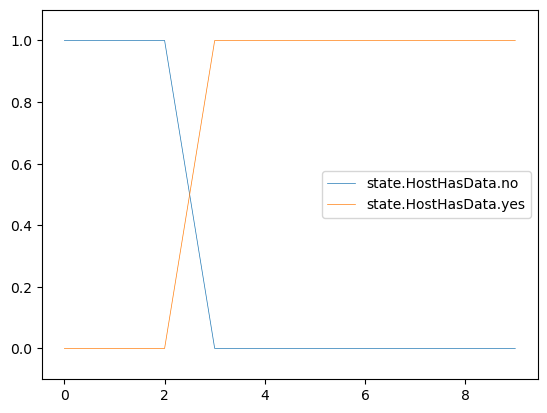

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0               Nop   
2                     1.0                      0.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                         su_login  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

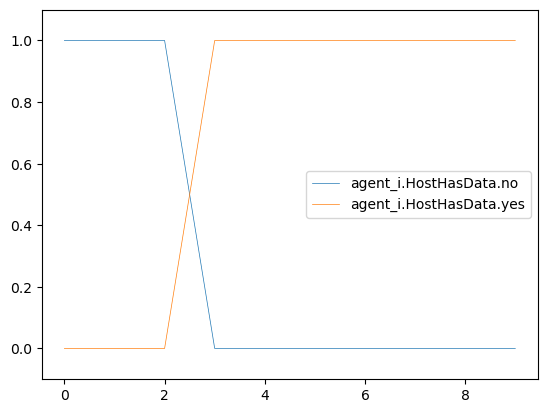

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.608108                 0.391892    EnumAccounts   
2                0.608108                 0.391892      PrivEscAcc   
3                0.406240                 0.593760       FileRecon   
4                0.083640                 0.916360  ManipulateData   
5                0.000094                 0.999906            Exit   
6                0.000094                 0.999906             Nop   
7                0.000094                 0.999906             Nop   
8                0.000094                 0.999906             Nop   
9                0.000094                 0.999906             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

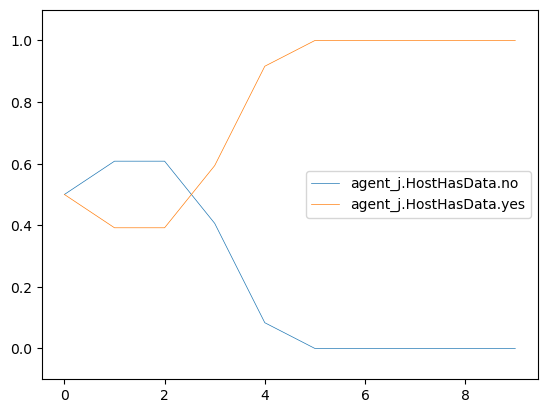

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0               Nop   
2                   0.0                    1.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

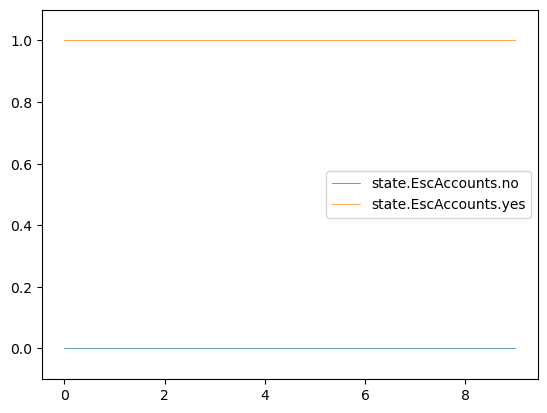

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     0.0                      1.0               Nop   
1                     0.0                      1.0               Nop   
2                     0.0                      1.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                         su_login  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

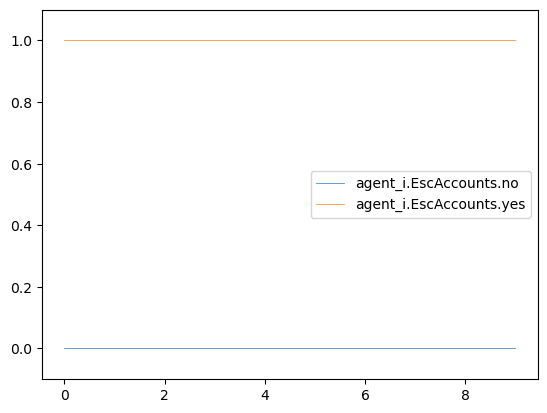

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.100806                 0.899194      PrivEscAcc   
3                0.000112                 0.999888       FileRecon   
4                0.000052                 0.999948  ManipulateData   
5                0.000037                 0.999963            Exit   
6                0.000037                 0.999963             Nop   
7                0.000037                 0.999963             Nop   
8                0.000037                 0.999963             Nop   
9                0.000037                 0.999963             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

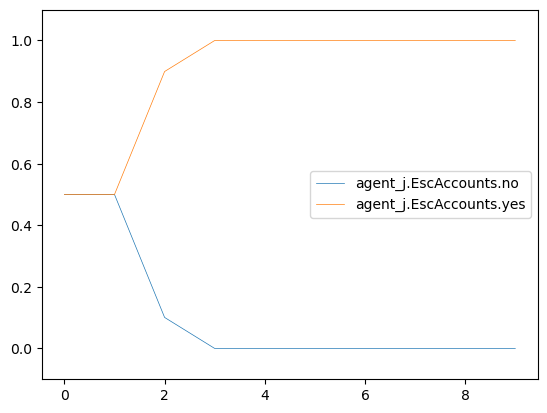

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0               Nop   
2                     0.0                     1.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

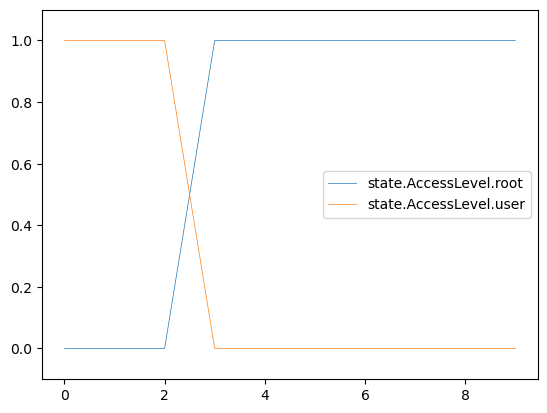

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000               Nop   
1                  0.000000                  1.000000               Nop   
2                  0.000000                  1.000000  DeployDataDecoys   
3                  0.989871                  0.010129               Nop   
4                  0.989997                  0.010002               Nop   
5                  0.998515                  0.001485               Nop   
6                  0.998443                  0.001557               Nop   
7                  0.998441                  0.001559               Nop   
8                  0.998441                  0.001559               Nop   
9                  0.998441                  0.001559               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                         su_login  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

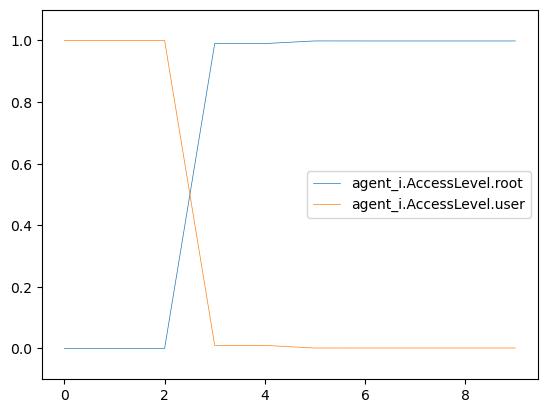

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999887                  0.000113       FileRecon   
4                  0.999947                  0.000053  ManipulateData   
5                  0.999963                  0.000037            Exit   
6                  0.999963                  0.000037             Nop   
7                  0.999963                  0.000037             Nop   
8                  0.999963                  0.000037             Nop   
9                  0.999963                  0.000037             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

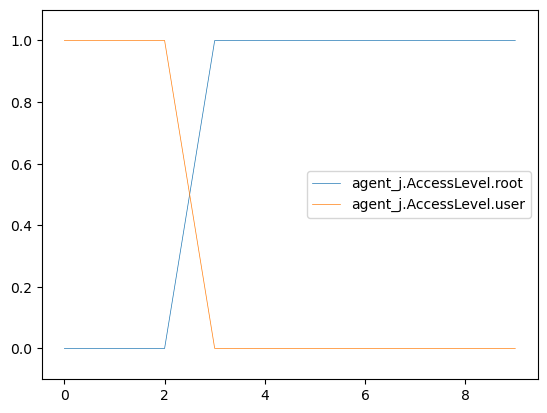

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop       FileRecon
1                 1.0                  0.0               Nop    EnumAccounts
2                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
3                 1.0                  0.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

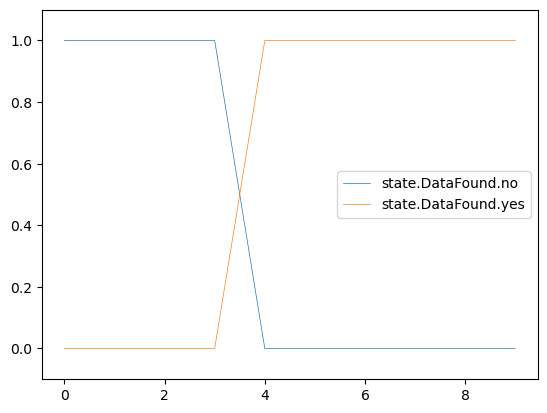

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000               Nop   
2              1.000000               0.000000  DeployDataDecoys   
3              1.000000               0.000000               Nop   
4              0.208002               0.791998               Nop   
5              0.028873               0.971127               Nop   
6              0.002135               0.997865               Nop   
7              0.001866               0.998135               Nop   
8              0.001866               0.998135               Nop   
9              0.001866               0.998135               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                         su_login  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

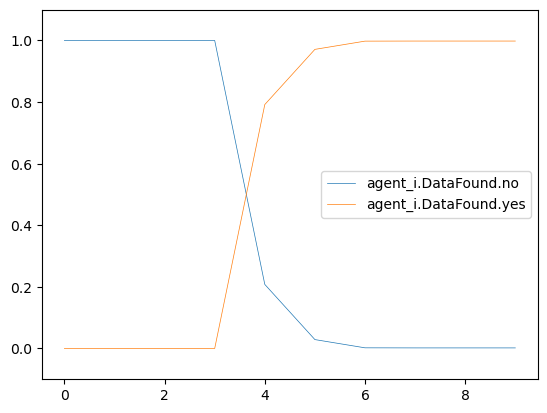

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000       FileRecon   
1              0.972973               0.027027    EnumAccounts   
2              0.972973               0.027027      PrivEscAcc   
3              0.972973               0.027027       FileRecon   
4              0.107083               0.892917  ManipulateData   
5              0.000120               0.999880            Exit   
6              0.000120               0.999880             Nop   
7              0.000120               0.999880             Nop   
8              0.000120               0.999880             Nop   
9              0.000120               0.999880             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

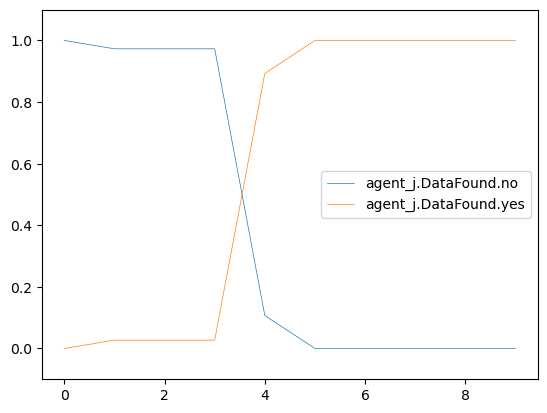

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0               Nop   
2                   1.0                   0.0  DeployDataDecoys   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

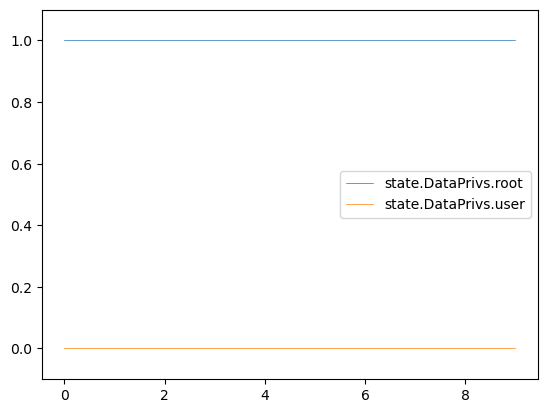

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0               Nop   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                         su_login  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

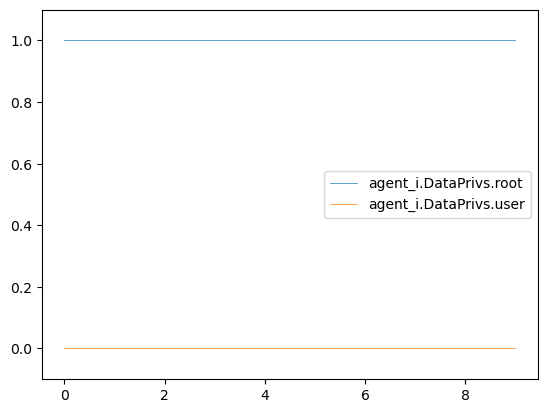

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.608108                0.391892    EnumAccounts   
2                0.608108                0.391892      PrivEscAcc   
3                0.608108                0.391892       FileRecon   
4                0.660546                0.339454  ManipulateData   
5                0.674153                0.325847            Exit   
6                0.674153                0.325847             Nop   
7                0.674153                0.325847             Nop   
8                0.674153                0.325847             Nop   
9                0.674153                0.325847             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

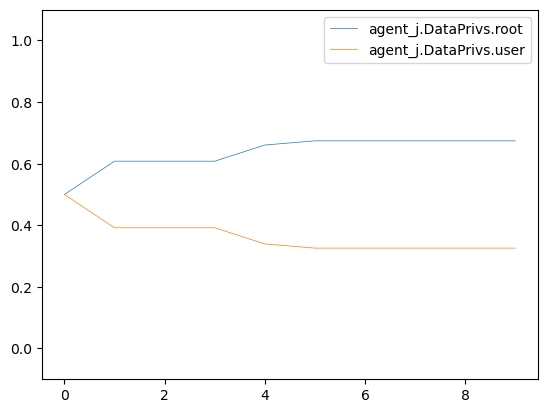

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                         su_login
3                               1.0                        file_enum
4                               1.0                        file_enum
5                               1.0                       file_write
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                       file_write

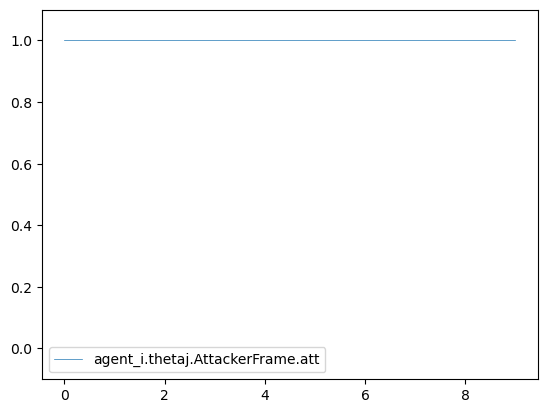

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.339934                        0.660066   
3                         0.335681                        0.664319   
4                         0.165730                        0.834270   
5                         0.433719                        0.566281   
6                         0.566495                        0.433505   
7                         0.566495                        0.433505   
8                         0.566495                        0.433505   
9                         0.566495                        0.433505   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                         none                           success   
3                         none                           failure   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                   user_files                           success   
8                   user_files                           success   
9                         none                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

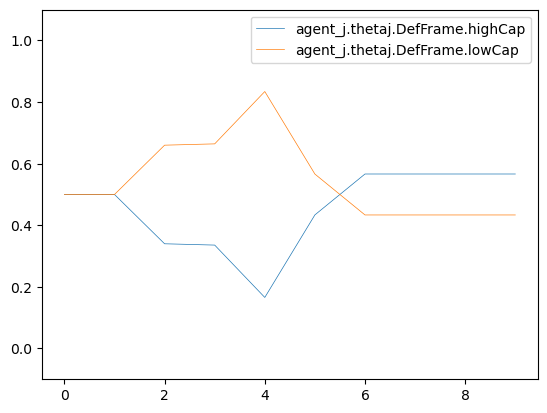

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop       FileRecon  
1                      1.0               Nop    EnumAccounts  
2                      1.0  DeployDataDecoys      PrivEscAcc  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop       FileRecon  
5                      1.0               Nop  ManipulateData  
6                      1.0               Nop            Exit  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

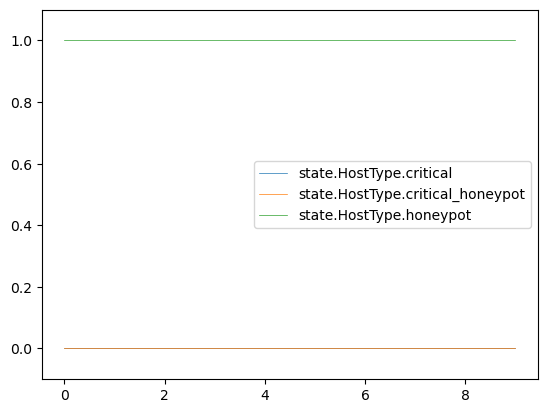

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop       FileRecon   
1                        1.0               Nop    EnumAccounts   
2                        1.0  DeployDataDecoys      PrivEscAcc   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop       FileRecon   
5                        1.0               Nop  ManipulateData   
6                        1.0               Nop            Exit   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                         su_login  
3                        file_enum  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                       file_write

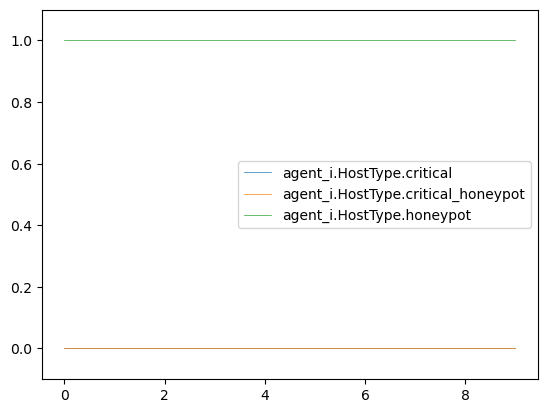

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0       FileRecon               Nop   
1                        0.0    EnumAccounts               Nop   
2                        0.0      PrivEscAcc  DeployDataDecoys   
3                        0.0       FileRecon               Nop   
4                        0.0       FileRecon               Nop   
5                        0.0  ManipulateData               Nop   
6                        0.0            Exit               Nop   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                         none                           success   
3                         none                           failure   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                   user_files                           success   
8                   user_files                           success   
9                         none                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

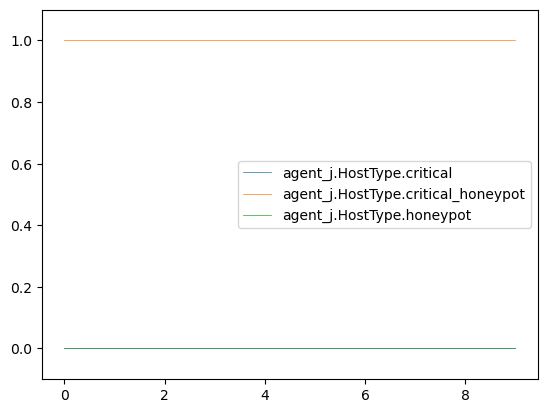

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0               Nop   
2                    1.0                     0.0  DeployDataDecoys   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

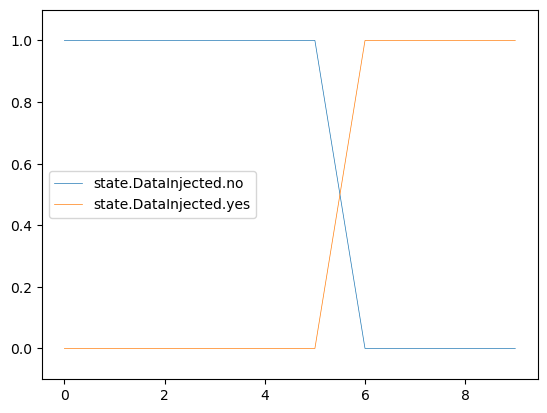

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000               Nop   
2                 1.000000                  0.000000  DeployDataDecoys   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.973177                  0.026823               Nop   
6                 0.032274                  0.967726               Nop   
7                 0.030164                  0.969836               Nop   
8                 0.030164                  0.969836               Nop   
9                 0.030164                  0.969836               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

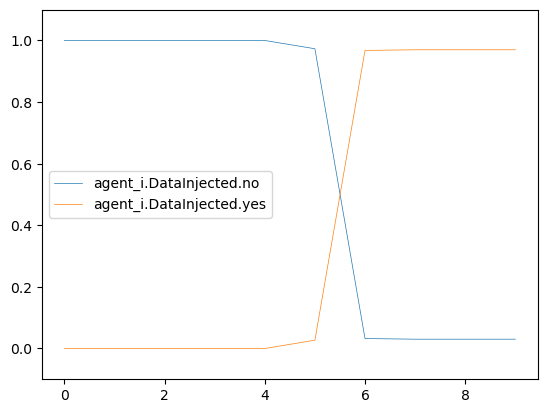

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                  1.00000                   0.00000       FileRecon   
1                  1.00000                   0.00000    EnumAccounts   
2                  1.00000                   0.00000      PrivEscAcc   
3                  1.00000                   0.00000       FileRecon   
4                  1.00000                   0.00000       FileRecon   
5                  1.00000                   0.00000  ManipulateData   
6                  0.00033                   0.99967            Exit   
7                  0.00033                   0.99967             Nop   
8                  0.00033                   0.99967             Nop   
9                  0.00033                   0.99967             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

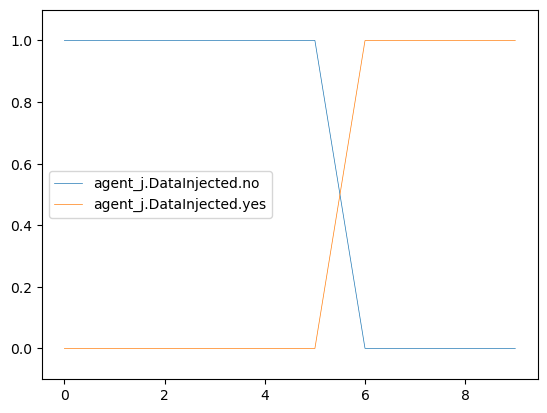

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop       FileRecon
1                 0.0                  1.0               Nop    EnumAccounts
2                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop       FileRecon
5                 0.0                  1.0               Nop  ManipulateData
6                 0.0                  1.0               Nop            Exit
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

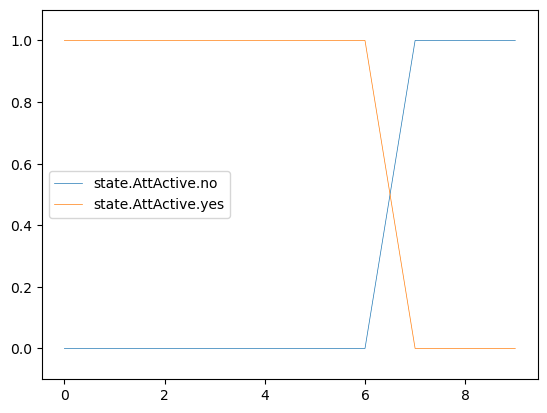

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          5.000000e-01           5.000000e-01               Nop   
1          1.020408e-02           9.897959e-01               Nop   
2          1.179412e-04           9.998820e-01  DeployDataDecoys   
3          1.229218e-06           9.999988e-01               Nop   
4          1.267250e-08           1.000000e+00               Nop   
5          4.768690e-10           1.000000e+00               Nop   
6          1.537723e-02           9.846229e-01               Nop   
7          9.999721e-01           2.795836e-05               Nop   
8          1.000000e+00           3.488483e-10               Nop   
9          1.000000e+00           4.655293e-15               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

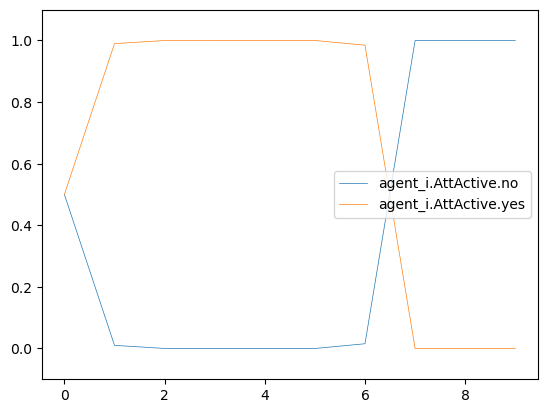

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0       FileRecon   
5                   0.0                    1.0  ManipulateData   
6                   0.0                    1.0            Exit   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

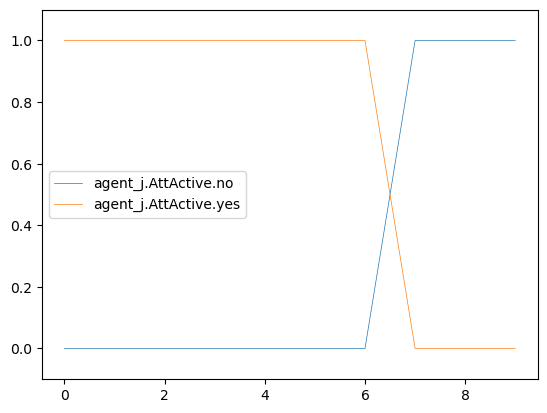

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop       FileRecon
1                1.0                 0.0               Nop    EnumAccounts
2                0.0                 1.0  DeployDataDecoys      PrivEscAcc
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop       FileRecon
5                0.0                 1.0               Nop  ManipulateData
6                0.0                 1.0               Nop            Exit
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

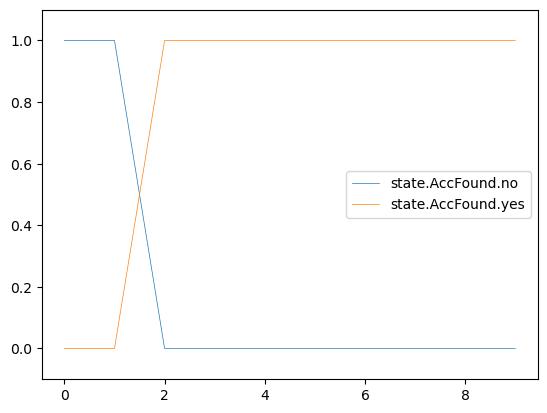

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000               Nop   
1             1.000000              0.000000               Nop   
2             0.011249              0.988751  DeployDataDecoys   
3             0.010001              0.989999               Nop   
4             0.010000              0.990000               Nop   
5             0.032889              0.967111               Nop   
6             0.012370              0.987630               Nop   
7             0.012397              0.987603               Nop   
8             0.012397              0.987603               Nop   
9             0.012397              0.987603               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

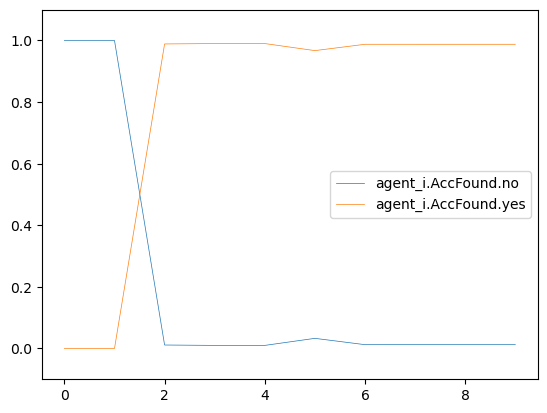

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000       FileRecon   
1             1.000000              0.000000    EnumAccounts   
2             0.101815              0.898186      PrivEscAcc   
3             0.000113              0.999887       FileRecon   
4             0.000171              0.999829       FileRecon   
5             0.000079              0.999921  ManipulateData   
6             0.000034              0.999966            Exit   
7             0.000034              0.999966             Nop   
8             0.000034              0.999966             Nop   
9             0.000034              0.999966             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

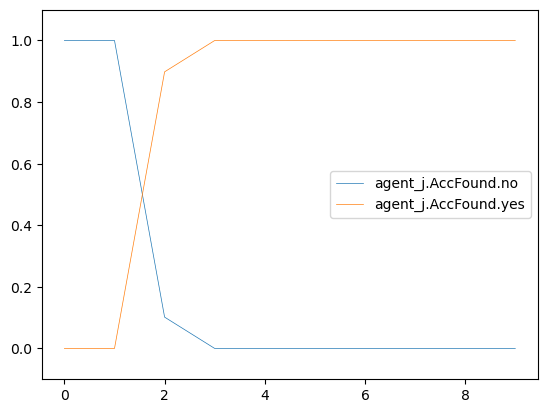

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0               Nop   
2                   1.0                    0.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

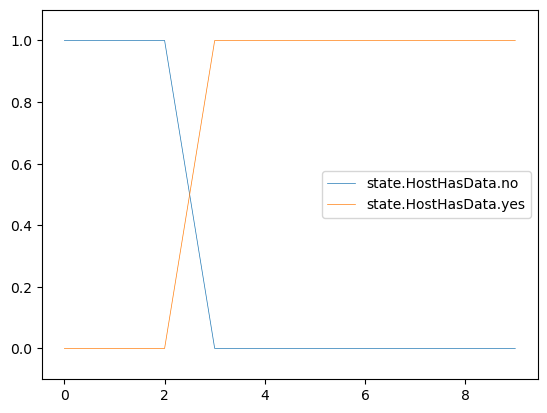

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0               Nop   
2                     1.0                      0.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

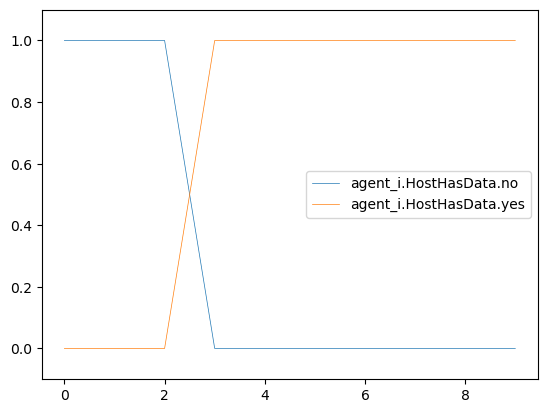

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.608108                 0.391892    EnumAccounts   
2                0.608108                 0.391892      PrivEscAcc   
3                0.406240                 0.593760       FileRecon   
4                0.708171                 0.291829       FileRecon   
5                0.234743                 0.765257  ManipulateData   
6                0.000312                 0.999688            Exit   
7                0.000312                 0.999688             Nop   
8                0.000312                 0.999688             Nop   
9                0.000312                 0.999688             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

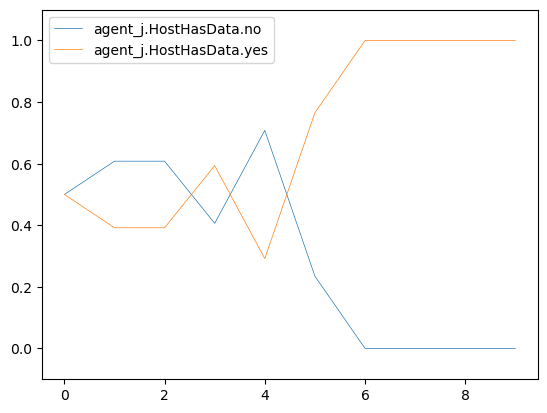

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0               Nop   
2                   0.0                    1.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

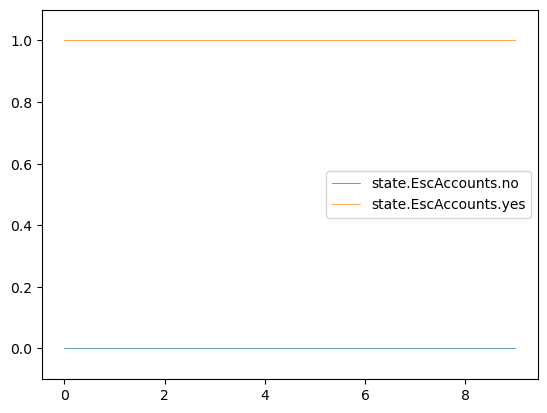

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     0.0                      1.0               Nop   
1                     0.0                      1.0               Nop   
2                     0.0                      1.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

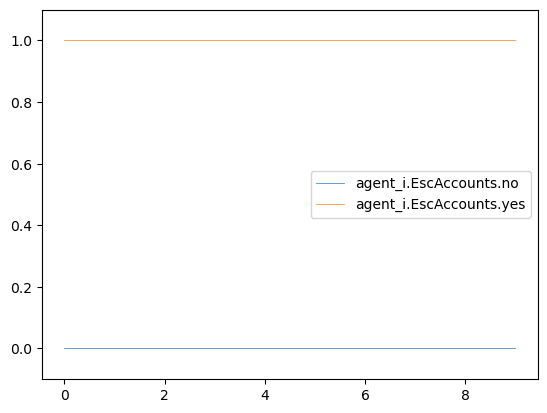

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.100806                 0.899194      PrivEscAcc   
3                0.000112                 0.999888       FileRecon   
4                0.000169                 0.999831       FileRecon   
5                0.000079                 0.999922  ManipulateData   
6                0.000034                 0.999966            Exit   
7                0.000034                 0.999966             Nop   
8                0.000034                 0.999966             Nop   
9                0.000034                 0.999966             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

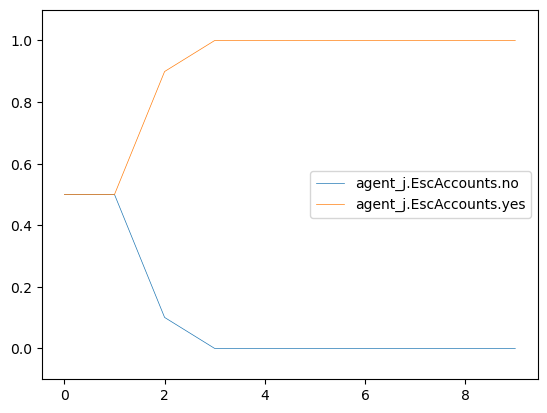

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0               Nop   
2                     0.0                     1.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

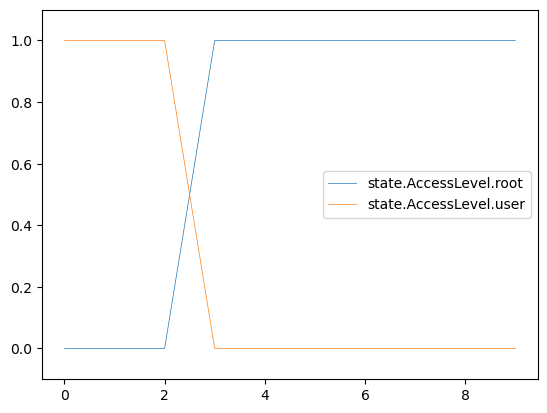

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000               Nop   
1                  0.000000                  1.000000               Nop   
2                  0.000000                  1.000000  DeployDataDecoys   
3                  0.989987                  0.010013               Nop   
4                  0.989999                  0.010001               Nop   
5                  0.967111                  0.032889               Nop   
6                  0.987630                  0.012370               Nop   
7                  0.987603                  0.012397               Nop   
8                  0.987603                  0.012397               Nop   
9                  0.987603                  0.012397               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

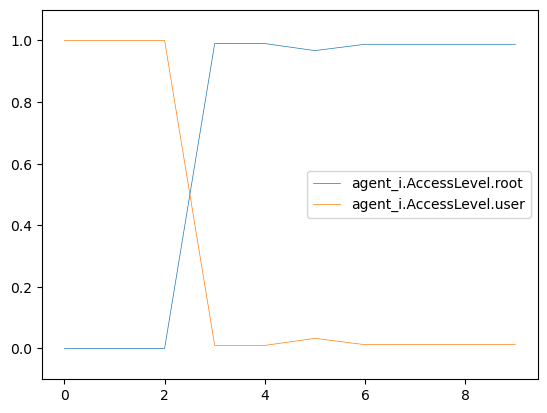

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999887                  0.000113       FileRecon   
4                  0.999829                  0.000171       FileRecon   
5                  0.999921                  0.000079  ManipulateData   
6                  0.999966                  0.000034            Exit   
7                  0.999966                  0.000034             Nop   
8                  0.999966                  0.000034             Nop   
9                  0.999966                  0.000034             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

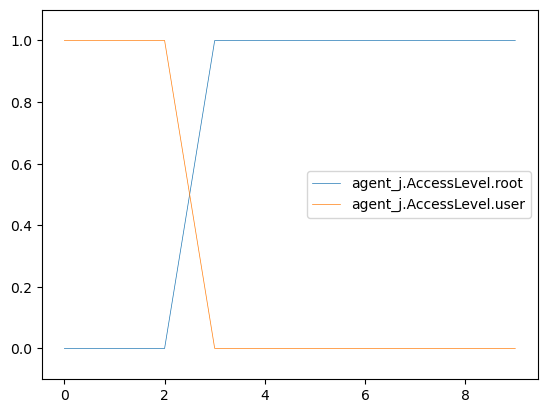

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop       FileRecon
1                 1.0                  0.0               Nop    EnumAccounts
2                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
3                 1.0                  0.0               Nop       FileRecon
4                 1.0                  0.0               Nop       FileRecon
5                 0.0                  1.0               Nop  ManipulateData
6                 0.0                  1.0               Nop            Exit
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

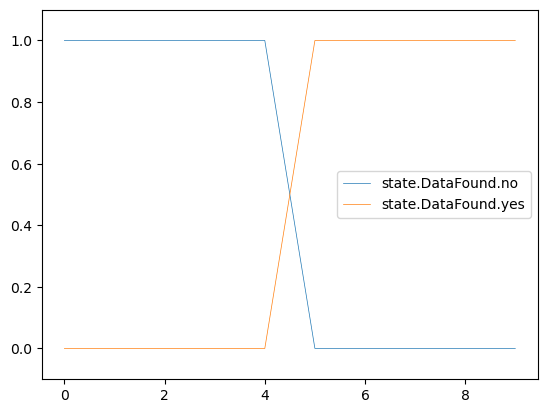

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000               Nop   
2              1.000000               0.000000  DeployDataDecoys   
3              1.000000               0.000000               Nop   
4              0.208001               0.791999               Nop   
5              0.163725               0.836275               Nop   
6              0.029873               0.970127               Nop   
7              0.029904               0.970096               Nop   
8              0.029904               0.970096               Nop   
9              0.029904               0.970096               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

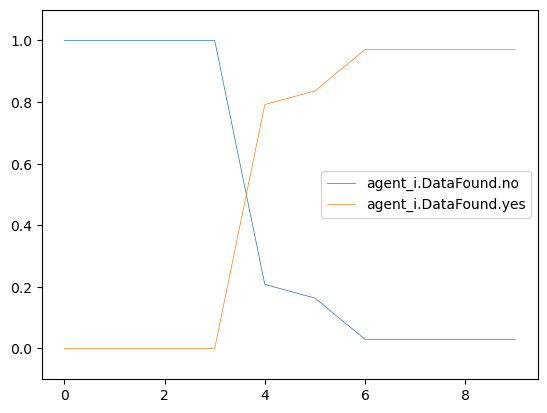

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000       FileRecon   
1              0.972973               0.027027    EnumAccounts   
2              0.972973               0.027027      PrivEscAcc   
3              0.972973               0.027027       FileRecon   
4              0.906664               0.093336       FileRecon   
5              0.247926               0.752074  ManipulateData   
6              0.000330               0.999670            Exit   
7              0.000330               0.999670             Nop   
8              0.000330               0.999670             Nop   
9              0.000330               0.999670             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

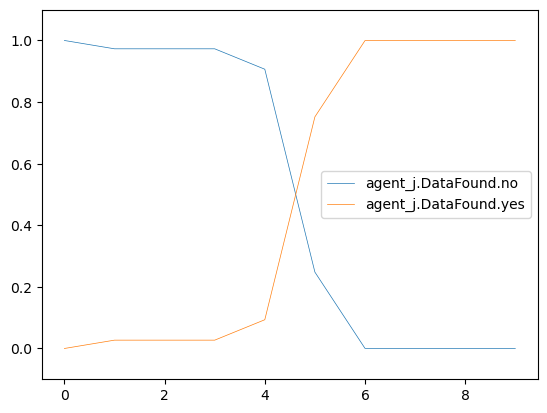

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0               Nop   
2                   1.0                   0.0  DeployDataDecoys   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

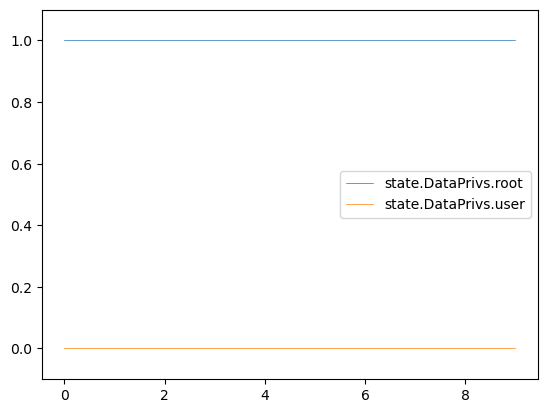

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0               Nop   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                       file_write

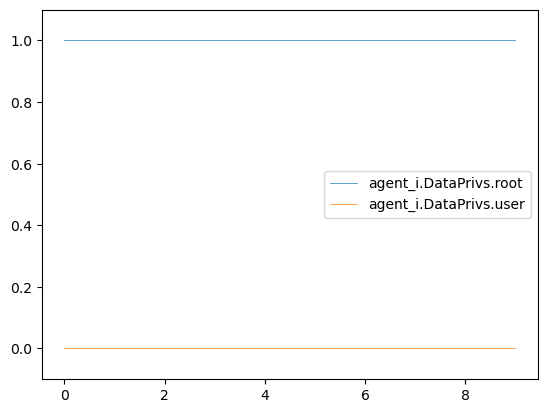

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.608108                0.391892    EnumAccounts   
2                0.608108                0.391892      PrivEscAcc   
3                0.608108                0.391892       FileRecon   
4                0.558776                0.441224       FileRecon   
5                0.652721                0.347279  ManipulateData   
6                0.699242                0.300758            Exit   
7                0.699242                0.300758             Nop   
8                0.699242                0.300758             Nop   
9                0.699242                0.300758             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

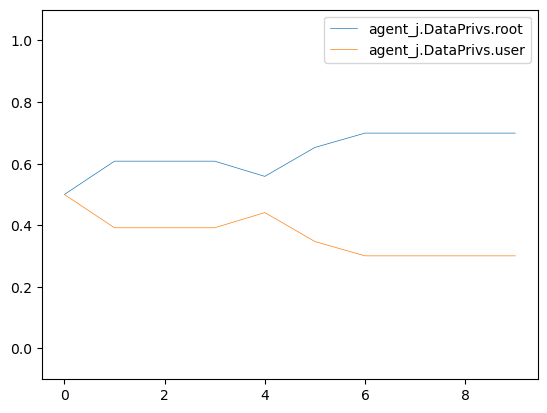

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                         su_login
3                               1.0                        file_enum
4                               1.0                        file_enum
5                               1.0                       file_write
6                               1.0                             none
7                               1.0                             none
8                               1.0                       file_write
9                               1.0                       file_write

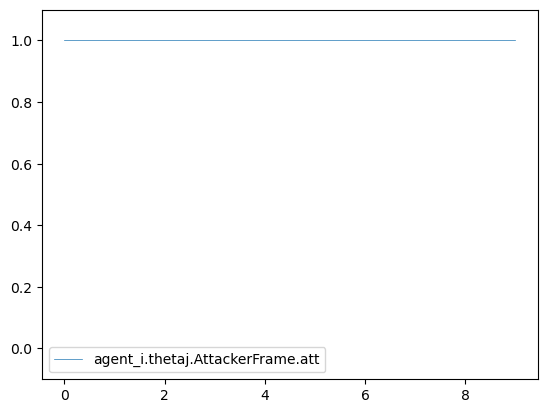

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.339934                        0.660066   
3                         0.335681                        0.664319   
4                         0.165730                        0.834270   
5                         0.433719                        0.566281   
6                         0.566495                        0.433505   
7                         0.566495                        0.433505   
8                         0.566495                        0.433505   
9                         0.566495                        0.433505   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                   user_files                           success   
5                         none                           success   
6                         none                           failure   
7                   user_files                           failure   
8                   user_files                           success   
9                         none                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

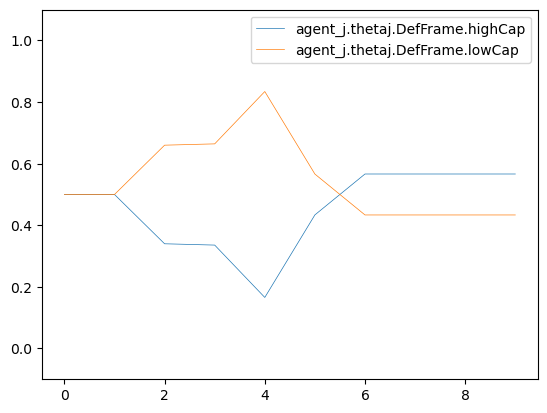

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop       FileRecon  
1                      1.0               Nop    EnumAccounts  
2                      1.0  DeployDataDecoys      PrivEscAcc  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop       FileRecon  
5                      1.0               Nop  ManipulateData  
6                      1.0               Nop            Exit  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

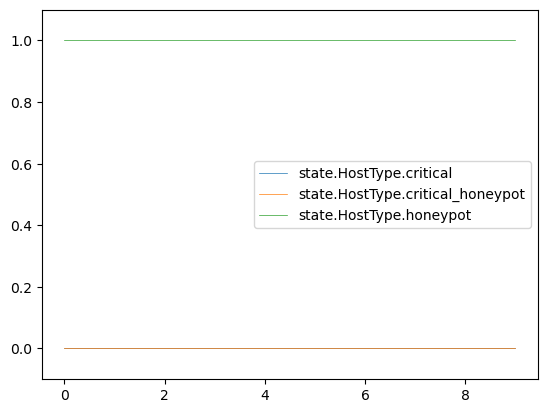

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop       FileRecon   
1                        1.0               Nop    EnumAccounts   
2                        1.0  DeployDataDecoys      PrivEscAcc   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop       FileRecon   
5                        1.0               Nop  ManipulateData   
6                        1.0               Nop            Exit   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                         su_login  
3                        file_enum  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                       file_write  
9                       file_write

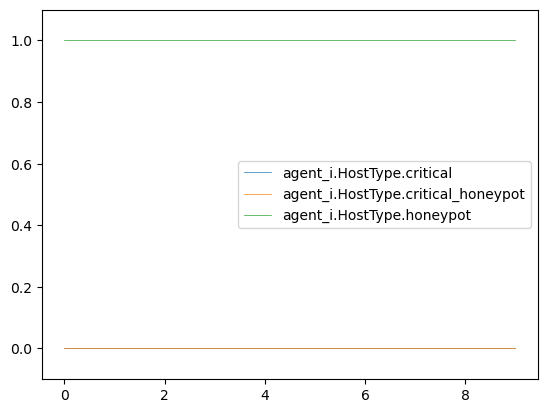

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0       FileRecon               Nop   
1                        0.0    EnumAccounts               Nop   
2                        0.0      PrivEscAcc  DeployDataDecoys   
3                        0.0       FileRecon               Nop   
4                        0.0       FileRecon               Nop   
5                        0.0  ManipulateData               Nop   
6                        0.0            Exit               Nop   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                   user_files                           success   
5                         none                           success   
6                         none                           failure   
7                   user_files                           failure   
8                   user_files                           success   
9                         none                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

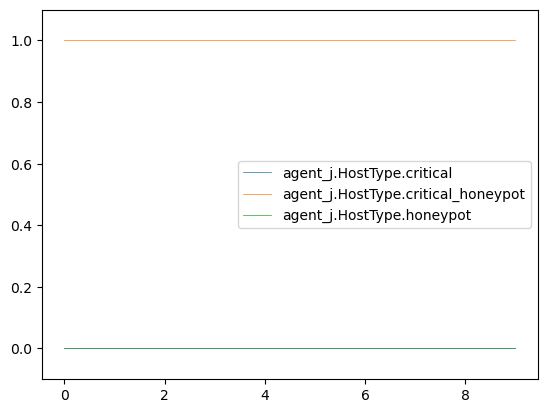

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0               Nop   
2                    1.0                     0.0  DeployDataDecoys   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

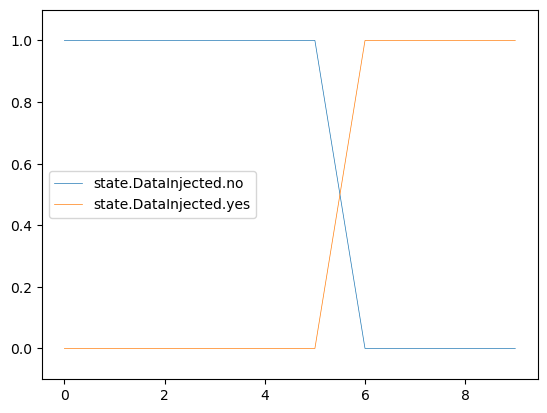

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000               Nop   
2                 1.000000                  0.000000  DeployDataDecoys   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.973177                  0.026823               Nop   
6                 0.032274                  0.967726               Nop   
7                 0.030164                  0.969836               Nop   
8                 0.030164                  0.969836               Nop   
9                 0.030164                  0.969836               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                       file_write

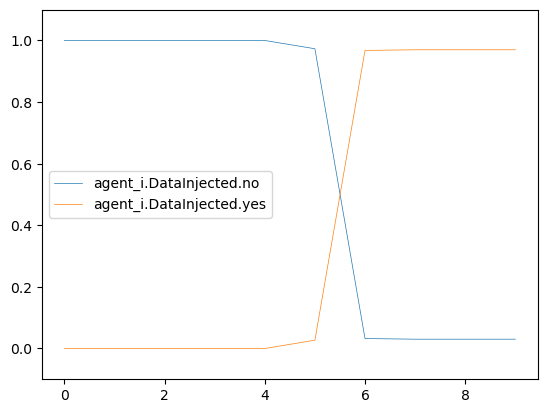

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                  1.00000                   0.00000       FileRecon   
1                  1.00000                   0.00000    EnumAccounts   
2                  1.00000                   0.00000      PrivEscAcc   
3                  1.00000                   0.00000       FileRecon   
4                  1.00000                   0.00000       FileRecon   
5                  1.00000                   0.00000  ManipulateData   
6                  0.00033                   0.99967            Exit   
7                  0.00033                   0.99967             Nop   
8                  0.00033                   0.99967             Nop   
9                  0.00033                   0.99967             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

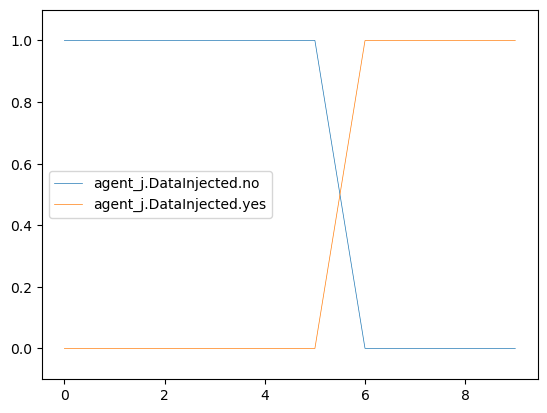

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop       FileRecon
1                 0.0                  1.0               Nop    EnumAccounts
2                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop       FileRecon
5                 0.0                  1.0               Nop  ManipulateData
6                 0.0                  1.0               Nop            Exit
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

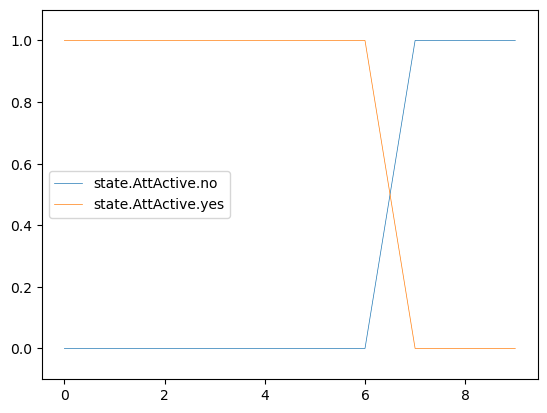

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          5.000000e-01           5.000000e-01               Nop   
1          1.020408e-02           9.897959e-01               Nop   
2          1.179412e-04           9.998820e-01  DeployDataDecoys   
3          1.229218e-06           9.999988e-01               Nop   
4          1.267250e-08           1.000000e+00               Nop   
5          4.768690e-10           1.000000e+00               Nop   
6          1.537723e-02           9.846229e-01               Nop   
7          9.999721e-01           2.795836e-05               Nop   
8          1.000000e+00           3.488483e-10               Nop   
9          1.000000e+00           1.758857e-12               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                       file_write

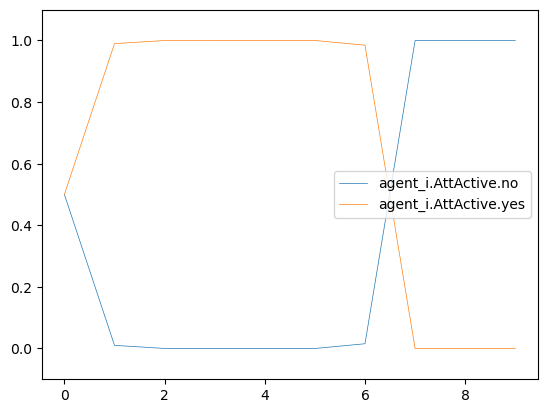

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0       FileRecon   
5                   0.0                    1.0  ManipulateData   
6                   0.0                    1.0            Exit   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

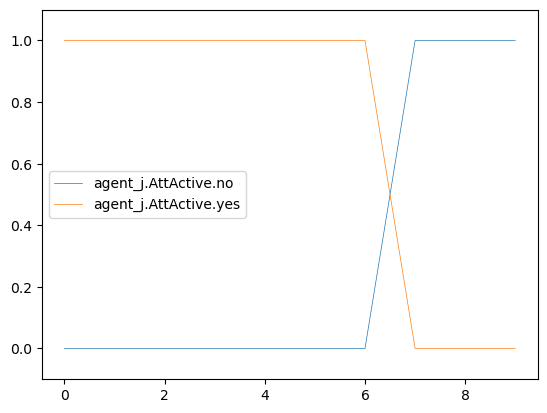

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop       FileRecon
1                1.0                 0.0               Nop    EnumAccounts
2                0.0                 1.0  DeployDataDecoys      PrivEscAcc
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop       FileRecon
5                0.0                 1.0               Nop  ManipulateData
6                0.0                 1.0               Nop            Exit
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

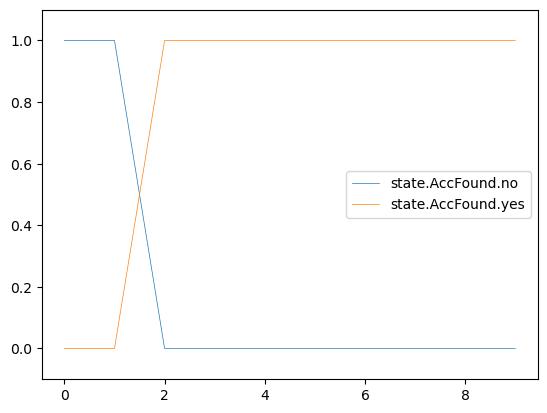

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000               Nop   
1             1.000000              0.000000               Nop   
2             0.011249              0.988751  DeployDataDecoys   
3             0.010001              0.989999               Nop   
4             0.010000              0.990000               Nop   
5             0.032889              0.967111               Nop   
6             0.012370              0.987630               Nop   
7             0.012397              0.987603               Nop   
8             0.012397              0.987603               Nop   
9             0.012397              0.987603               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                       file_write

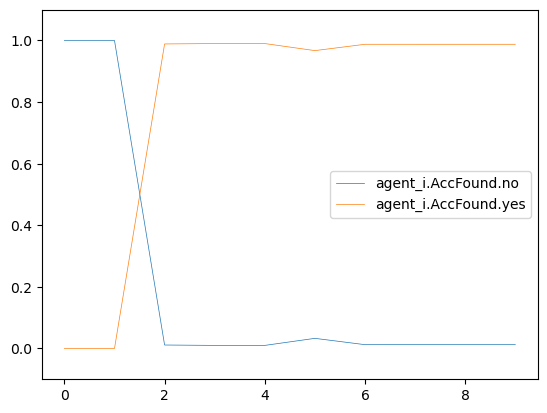

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000       FileRecon   
1             1.000000              0.000000    EnumAccounts   
2             0.101815              0.898186      PrivEscAcc   
3             0.000113              0.999887       FileRecon   
4             0.000171              0.999829       FileRecon   
5             0.000079              0.999921  ManipulateData   
6             0.000034              0.999966            Exit   
7             0.000034              0.999966             Nop   
8             0.000034              0.999966             Nop   
9             0.000034              0.999966             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

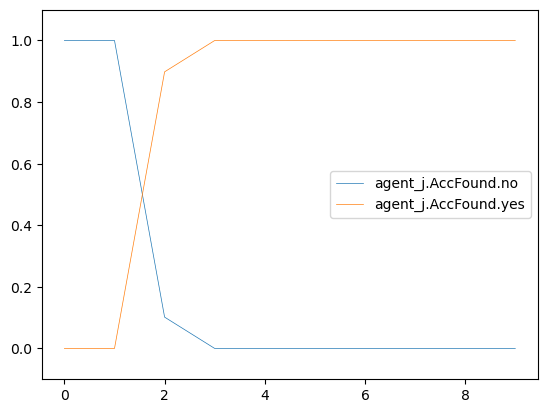

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0               Nop   
2                   1.0                    0.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

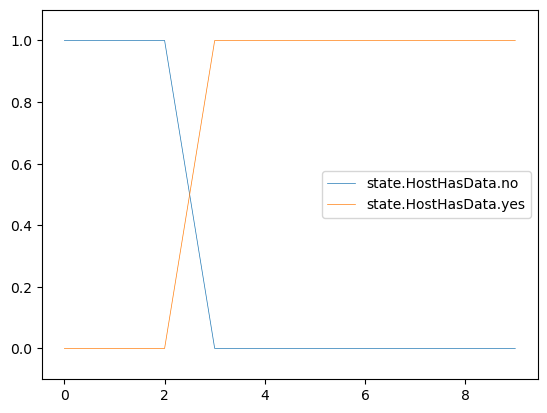

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0               Nop   
2                     1.0                      0.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                       file_write

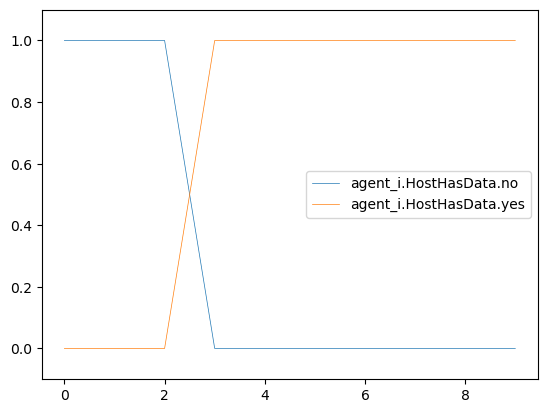

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.608108                 0.391892    EnumAccounts   
2                0.608108                 0.391892      PrivEscAcc   
3                0.406240                 0.593760       FileRecon   
4                0.708171                 0.291829       FileRecon   
5                0.234743                 0.765257  ManipulateData   
6                0.000312                 0.999688            Exit   
7                0.000312                 0.999688             Nop   
8                0.000312                 0.999688             Nop   
9                0.000312                 0.999688             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

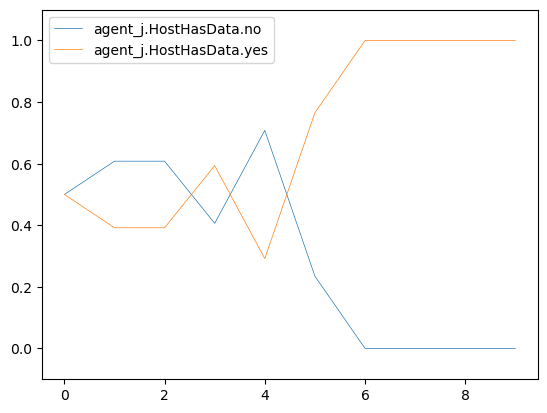

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0               Nop   
2                   0.0                    1.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

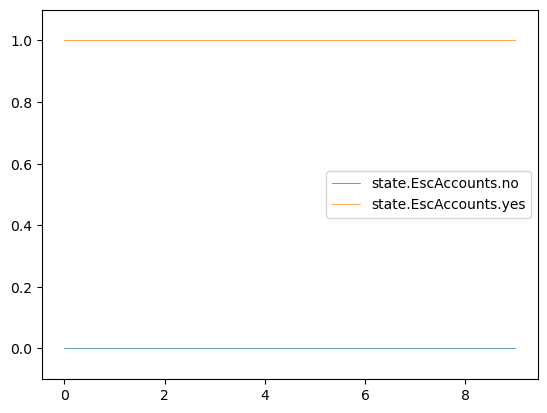

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     0.0                      1.0               Nop   
1                     0.0                      1.0               Nop   
2                     0.0                      1.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                       file_write

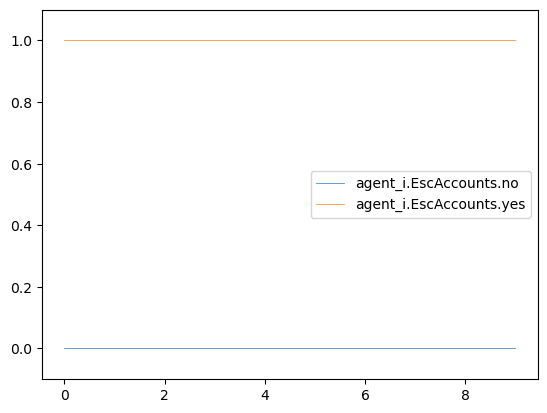

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.100806                 0.899194      PrivEscAcc   
3                0.000112                 0.999888       FileRecon   
4                0.000169                 0.999831       FileRecon   
5                0.000079                 0.999922  ManipulateData   
6                0.000034                 0.999966            Exit   
7                0.000034                 0.999966             Nop   
8                0.000034                 0.999966             Nop   
9                0.000034                 0.999966             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

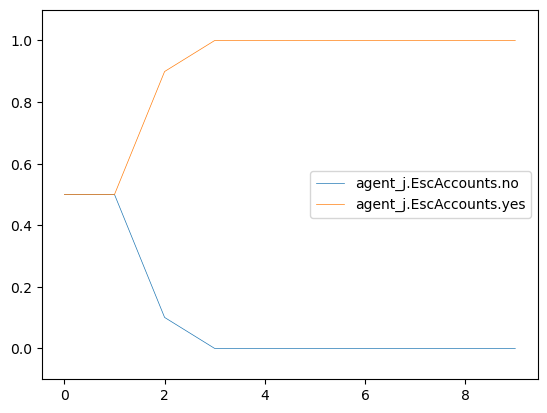

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0               Nop   
2                     0.0                     1.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

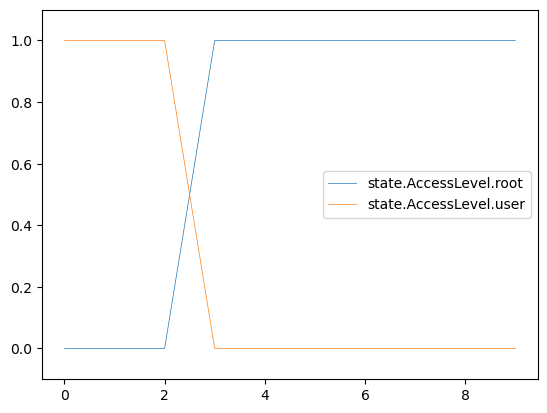

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000               Nop   
1                  0.000000                  1.000000               Nop   
2                  0.000000                  1.000000  DeployDataDecoys   
3                  0.989987                  0.010013               Nop   
4                  0.989999                  0.010001               Nop   
5                  0.967111                  0.032889               Nop   
6                  0.987630                  0.012370               Nop   
7                  0.987603                  0.012397               Nop   
8                  0.987603                  0.012397               Nop   
9                  0.987603                  0.012397               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                       file_write

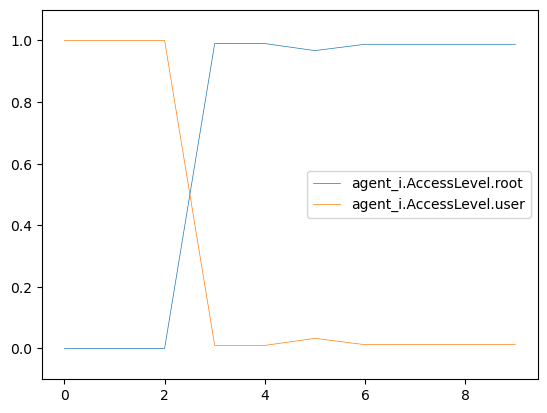

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999887                  0.000113       FileRecon   
4                  0.999829                  0.000171       FileRecon   
5                  0.999921                  0.000079  ManipulateData   
6                  0.999966                  0.000034            Exit   
7                  0.999966                  0.000034             Nop   
8                  0.999966                  0.000034             Nop   
9                  0.999966                  0.000034             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

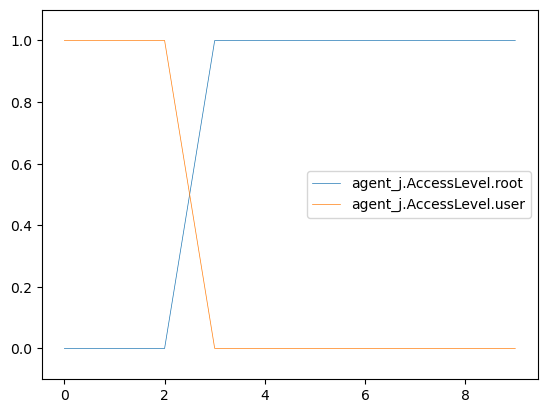

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop       FileRecon
1                 1.0                  0.0               Nop    EnumAccounts
2                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
3                 1.0                  0.0               Nop       FileRecon
4                 1.0                  0.0               Nop       FileRecon
5                 0.0                  1.0               Nop  ManipulateData
6                 0.0                  1.0               Nop            Exit
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

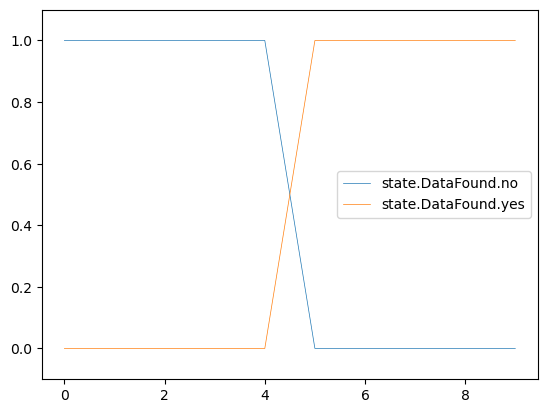

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000               Nop   
2              1.000000               0.000000  DeployDataDecoys   
3              1.000000               0.000000               Nop   
4              0.208001               0.791999               Nop   
5              0.163725               0.836275               Nop   
6              0.029873               0.970127               Nop   
7              0.029904               0.970096               Nop   
8              0.029904               0.970096               Nop   
9              0.029904               0.970096               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                       file_write

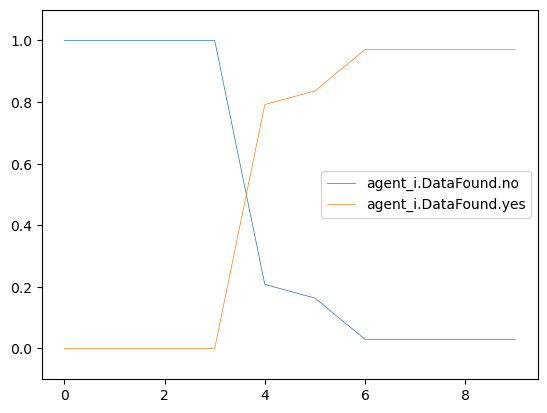

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000       FileRecon   
1              0.972973               0.027027    EnumAccounts   
2              0.972973               0.027027      PrivEscAcc   
3              0.972973               0.027027       FileRecon   
4              0.906664               0.093336       FileRecon   
5              0.247926               0.752074  ManipulateData   
6              0.000330               0.999670            Exit   
7              0.000330               0.999670             Nop   
8              0.000330               0.999670             Nop   
9              0.000330               0.999670             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

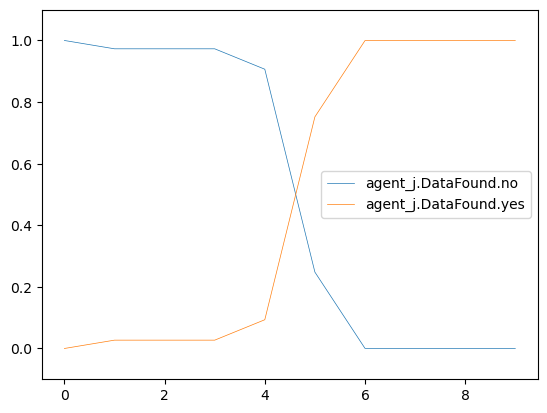

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0               Nop   
2                   1.0                   0.0  DeployDataDecoys   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

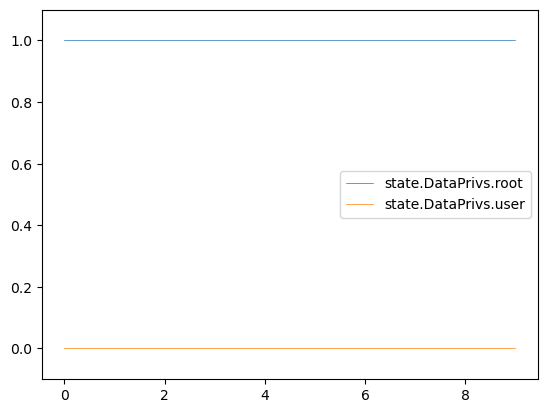

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0               Nop   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                       file_write

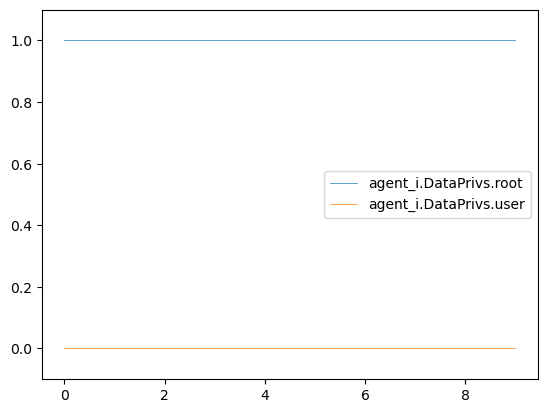

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.608108                0.391892    EnumAccounts   
2                0.608108                0.391892      PrivEscAcc   
3                0.608108                0.391892       FileRecon   
4                0.558776                0.441224       FileRecon   
5                0.652721                0.347279  ManipulateData   
6                0.699242                0.300758            Exit   
7                0.699242                0.300758             Nop   
8                0.699242                0.300758             Nop   
9                0.699242                0.300758             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

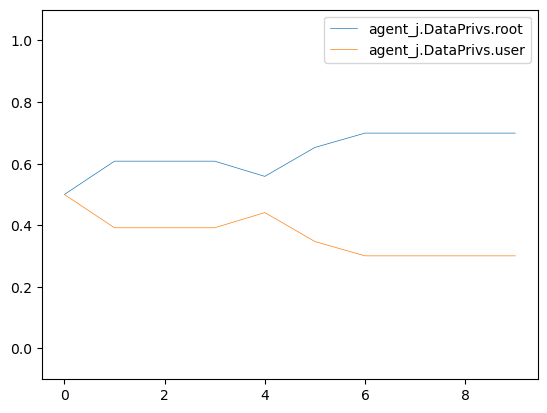

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES[:5]:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)

    